# Project Statistical Methods for Decision Making : Austo Motor Company Data Analysis

### Context

Austo Motor Company is a leading car manufacturer specializing in SUV, Sedan, and Hatchback models. In its recent board meeting, concerns were raised by the members on the efficiency of the marketing campaign currently being used. The board decides to rope in an analytics professional to improve the existing campaign.

### Objective

The Company wants to analyze the data to get a fair idea about the demand of customers which will help them in enhancing their customer experience. The Data Science team has shared some of the key questions that need to be answered. As a Data Scientist at the company i need to perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

* age: The age of the individual in years.
* gender: The gender of the individual, categorized as male or female.
* profession: The occupation or profession of the individual.
* marital_status: The marital status of the individual, such as married &, single
* education: The educational qualification of the individual Graduate and Post Graduate
* no_of_dependents: The number of dependents (e.g., children, elderly parents) that the individual supports financially.
* personal_loan: A binary variable indicating whether the individual has taken a personal loan "Yes" or "No"
* house_loan: A binary variable indicating whether the individual has taken a housing loan "Yes" or "No"
* partner_working: A binary variable indicating whether the individual's partner is employed "Yes" or "No"
* salary: The individual's salary or income.
* partner_salary: The salary or income of the individual's partner, if applicable.
* Total_salary: The total combined salary of the individual and their partner (if applicable).
* price: The price of a product or service.
* make: The type of automobile

## Problem 1

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('austo_automobile.csv')

In [3]:
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [4]:
df.shape

(1581, 14)

In [5]:
df.dtypes

Age                   int64
Gender               object
Profession           object
Marital_status       object
Education            object
No_of_Dependents      int64
Personal_loan        object
House_loan           object
Partner_working      object
Salary                int64
Partner_salary      float64
Total_salary          int64
Price                 int64
Make                 object
dtype: object

In [6]:
df.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

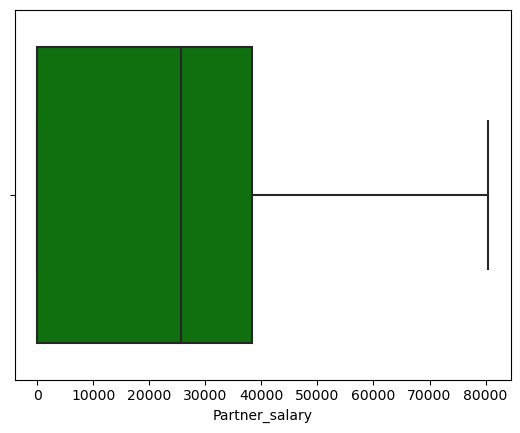

In [7]:
sns.boxplot(data=df, x= 'Partner_salary', color='green');

In [8]:
mode1=df["Gender"].mode().values[0]
df['Gender'].mode().values

array(['Male'], dtype=object)

In [9]:
df["Gender"]=df["Gender"].replace(np.nan,mode1)

In [10]:
df.isnull().sum()

Age                   0
Gender                0
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [11]:
mean1=df["Partner_salary"].mean()

In [12]:
df["Partner_salary"].replace(np.nan,mean1,inplace=True)

In [13]:
df.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

### We can see that we have various missing values in two columns. There are various ways of treating our missing values in the data set. When to use which technique is actually dependent on the type of data we are dealing with.

**Referring to the above box plots it seems that the variable Partner_salary has no outliers present in the variables. So we can replace the the  numerical columns with mean values.**

* Drop the missing values : In this case we drop the missing values from those variables if there are very few missing values

* Impute with mean value : For numerical column, we can replace the missing values with mean values. Before replacing with mean value, it is advisable to check that the variable shouldn't have extreme values i.e. outliers.

* Impute with median value : For numerical column, we can also replace the missing values with median values. In case we have extreme values such as outliers it is advisable to use median approach.

* Impute with mode value : For categorical column, we can replace the missing values with mode values i.e the most frequent ones.

#### In this dataset, we will replace the numerical columns with mean values and for categorical columns we will replace the missing values with mode values

In [14]:
df.describe()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
count,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000
mean,31.922201,2.457938,60392.220114,20225.559322,79625.996205,35597.722960
std,8.425978,0.943483,14674.825044,18905.183912,25545.857768,13633.636545
min,22.000000,0.000000,30000.000000,0.000000,30000.000000,18000.000000
25%,25.000000,2.000000,51900.000000,0.000000,60500.000000,25000.000000
50%,29.000000,2.000000,59500.000000,24900.000000,78000.000000,31000.000000
75%,38.000000,3.000000,71800.000000,38000.000000,95900.000000,47000.000000
max,54.000000,4.000000,99300.000000,80500.000000,171000.000000,70000.000000


In [15]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make


### There are no duplicates in the df


In [16]:
columns1 = ['Gender', 'Profession', 'Marital_status', 'Education', 'Personal_loan', 'House_loan', 'Partner_working', 'Make']

for column in columns1:
    unique_values = df[column].unique()
    print(f'Unique values in column "{column}":', unique_values)

Unique values in column "Gender": ['Male' 'Femal' 'Female' 'Femle']
Unique values in column "Profession": ['Business' 'Salaried']
Unique values in column "Marital_status": ['Married' 'Single']
Unique values in column "Education": ['Post Graduate' 'Graduate']
Unique values in column "Personal_loan": ['No' 'Yes']
Unique values in column "House_loan": ['No' 'Yes']
Unique values in column "Partner_working": ['Yes' 'No']
Unique values in column "Make": ['SUV' 'Sedan' 'Hatchback']


### Seems like there is a spelling mistake in the data entry of Gender variable 'female' , as 'Femal' and 'Femle' , so we can correct that.

In [17]:
gender_mapping = {'Femal': 'Female', 'Femle': 'Female',}

In [18]:
df['Gender'] = df['Gender'].replace(gender_mapping)

In [19]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

### So the spelling mistakes have been fixed and now there are only two variable in 'Gender' , 'Male' and 'Female'.

# Problem 1 - Univariate Analysis

### Exploring all the variables (categorical and numerical) in the data

In [20]:
df.select_dtypes(include=['object'])

,Gender,Profession,Marital_status,Education,Personal_loan,House_loan,Partner_working,Make
0,Male,Business,Married,Post Graduate,No,No,Yes,SUV
1,Female,Salaried,Married,Post Graduate,Yes,No,Yes,SUV
2,Female,Salaried,Married,Post Graduate,No,No,Yes,SUV
3,Female,Salaried,Married,Graduate,Yes,No,Yes,SUV
4,Male,Salaried,Married,Post Graduate,No,No,Yes,SUV
...,...,...,...,...,...,...,...,...
1576,Male,Salaried,Single,Graduate,No,Yes,No,Hatchback
1577,Male,Business,Married,Graduate,No,No,No,Hatchback
1578,Male,Business,Single,Graduate,No,Yes,No,Hatchback
1579,Male,Business,Married,Graduate,Yes,Yes,No,Hatchback


In [21]:
df['Gender'].value_counts()

Gender
Male      1252
Female     329
Name: count, dtype: int64

In [22]:
df['Profession'].value_counts()

Profession
Salaried    896
Business    685
Name: count, dtype: int64

In [23]:
df['Marital_status'].value_counts()

Marital_status
Married    1443
Single      138
Name: count, dtype: int64

In [24]:
df['Education'].value_counts()

Education
Post Graduate    985
Graduate         596
Name: count, dtype: int64

In [25]:
df['Personal_loan'].value_counts()

Personal_loan
Yes    792
No     789
Name: count, dtype: int64

In [26]:
df['House_loan'].value_counts()

House_loan
No     1054
Yes     527
Name: count, dtype: int64

In [27]:
df['Partner_working'].value_counts()

Partner_working
Yes    868
No     713
Name: count, dtype: int64

In [28]:
df['Make'].value_counts()

Make
Sedan        702
Hatchback    582
SUV          297
Name: count, dtype: int64

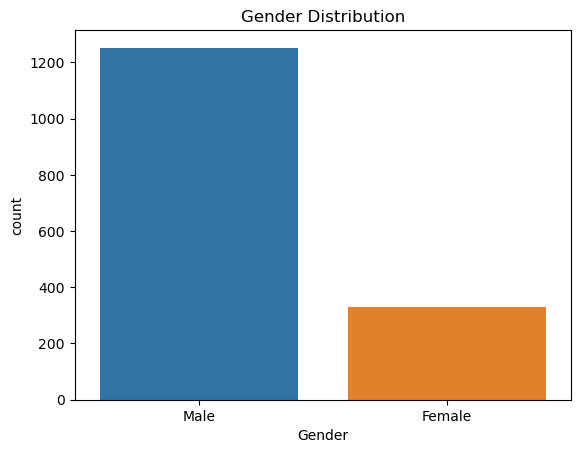

In [29]:
sns.countplot(x= 'Gender', data=df)
plt.title('Gender Distribution')
plt.show()

### Gender: Dominance of Male
* "In our dataset, the Gender variable exhibits a significant dominance of male individuals compared to female. This prevalence of male entries could be indicative of the demographics of the population being studied or a specific focus on male customers within the context of the dataset.

* The dominance of male individuals may influence the results of our analysis, particularly when looking at preferences for car models, loan acquisition, or purchasing behavior. For example, males may have different preferences for car makes or features compared to females. Further investigation is warranted to understand any potential biases this imbalance may introduce and to adjust analyses accordingly."

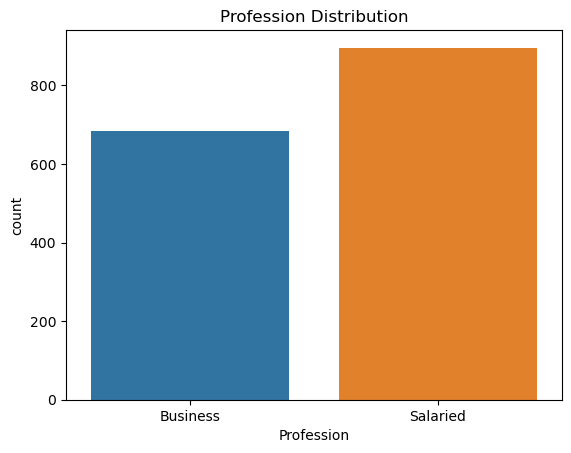

In [30]:
sns.countplot(x= 'Profession', data=df)
plt.title('Profession Distribution')
plt.show()

### "In our analysis of the Profession variable, we found the following distribution of professions:

* Salaried: This is the most common profession in our dataset, with 896 entries. It suggests a majority of individuals in our study hold salaried positions, pointing to the prominence of traditional employment arrangements in the population.
* Business: The next most common profession, with 685 entries, represents a significant portion of the dataset. This suggests a considerable entrepreneurial or self-employed demographic.

###### The higher representation of salaried individuals indicates a stable, steady income source that could shape their purchasing choices, particularly in areas such as car buying and loan acquisition. This group may prioritize dependability and cost-effectiveness in their financial decisions.   
###### Conversely, the substantial number of business professionals indicates a group with potentially diverse income levels and risk appetites. This demographic may have different preferences and behaviors compared to salaried individuals, such as a propensity to invest in higher-priced car models or seek more flexible financial products."

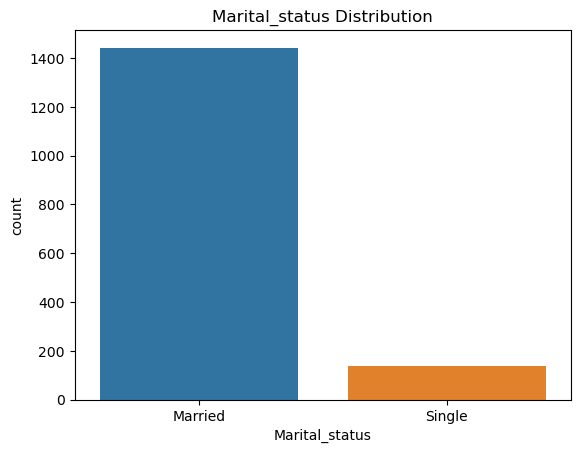

In [31]:
sns.countplot(x= 'Marital_status', data=df)
plt.title('Marital_status Distribution')
plt.show()

### Marital Status: Dominance of Married
* "In the Marital_status variable, we observed a significant dominance of married individuals in our dataset. This trend suggests that the studied population includes a larger proportion of married individuals compared to other marital statuses.

* The dominance of married individuals can have various implications for our analysis. Married individuals may have different purchasing priorities compared to single individuals, such as prioritizing family-friendly features in cars or different levels of affordability. Additionally, the financial stability and household income levels of married individuals may influence their purchasing decisions and loan preferences.

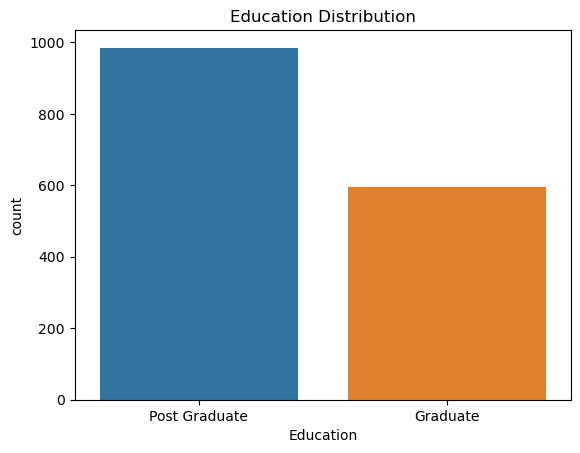

In [32]:
sns.countplot(x= 'Education', data=df)
plt.title('Education Distribution')
plt.show()

### "In our analysis of the Education variable, we observed the following distribution of education levels:

* Post Graduate: This is the most common education level in our dataset, comprising 985 entries. This suggests that a significant majority of individuals in our study have obtained a post-graduate degree, pointing to a well-educated population.
* Graduate: The next most common education level, with 596 entries, represents a notable portion of the dataset. This indicates a sizable segment of individuals with at least an undergraduate degree.
##### The prevalence of post-graduate individuals may reflect a population with higher earning potential and advanced skills, potentially influencing their purchasing choices, such as a preference for higher-priced or luxury car models. These individuals may also exhibit a greater level of financial literacy, affecting their behavior regarding loan acquisition and repayment.
##### Meanwhile, the presence of a significant graduate segment points to individuals with a strong educational foundation but perhaps less specialization compared to post-graduates. Their purchasing preferences and financial behavior might lean towards more affordable options in car buying and loans.

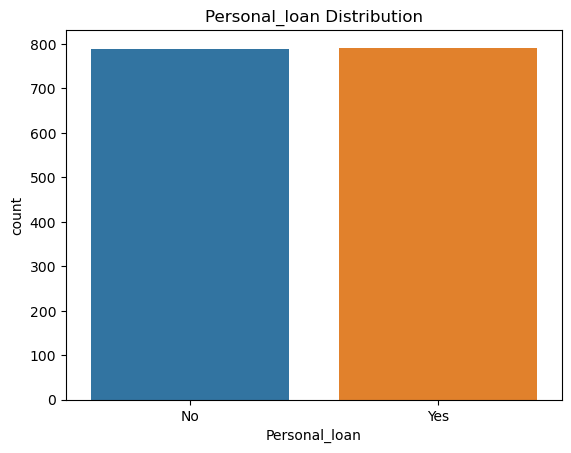

In [33]:
sns.countplot(x= 'Personal_loan', data=df)
plt.title('Personal_loan Distribution')
plt.show()

### In our analysis of the Personal_loan variable, we observed the following distribution of personal loan statuses:

* Yes: This category, with 792 entries, is slightly more common than its counterpart, indicating that a marginal majority of individuals in our study have taken out a personal loan. This may suggest a preference for financing personal expenditures or investments.
* No: The second category, with 789 entries, indicates a nearly equal portion of individuals who have not taken out a personal loan. This could point to a segment of the population that either has different financial resources or chooses alternative forms of financing.
###### The nearly equal distribution between individuals with and without a personal loan suggests diverse financial behaviors and preferences within the study population. Those with personal loans may be more inclined toward leveraging credit for purchases or investments, while those without personal loans may prefer to rely on savings or other funding sources.

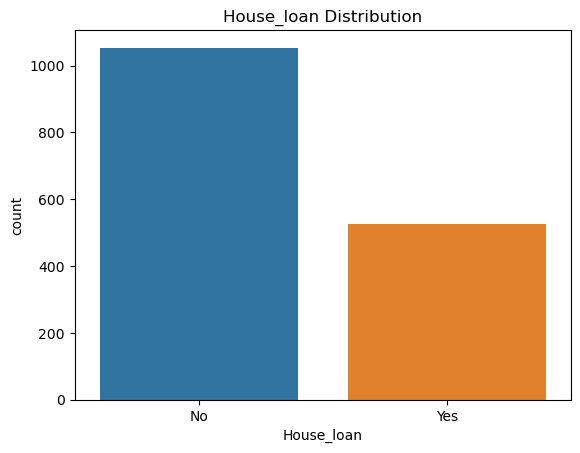

In [34]:
sns.countplot(x= 'House_loan', data=df)
plt.title('House_loan Distribution')
plt.show()

### In our analysis of the House_loan variable, we observed the following distribution of house loan statuses:

* No: The most prevalent category, with 1,054 entries, indicates that the majority of individuals in our study do not have a house loan. This suggests either stable housing situations that do not require financing or a preference for renting or other housing arrangements.
* Yes: The second most common status, with 527 entries, suggests that a significant portion of the dataset consists of individuals who have a house loan. This may point to a group that is actively engaged in homeownership or real estate investment.
##### The high prevalence of individuals without a house loan may reflect a population that is not yet in the homeownership stage of life or prefers other housing options. This can impact their purchasing behavior, especially in terms of affordability and financial stability.
##### On the other hand, the presence of individuals with a house loan indicates a group that may be more engaged in long-term financial commitments and asset acquisition. This population may exhibit different purchasing behaviors, potentially leaning toward higher-end car models or other substantial investments.

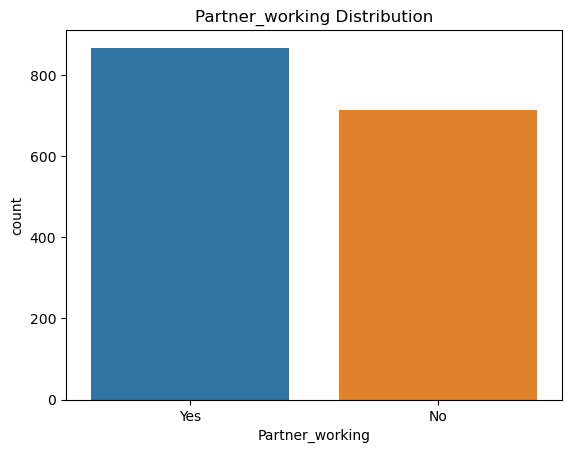

In [35]:
sns.countplot(x= 'Partner_working', data=df)
plt.title('Partner_working Distribution')
plt.show()

### In our analysis of the Partner_working variable, we observed the following distribution:

* Yes: The majority of individuals, with 868 entries, have partners who are employed. This suggests that a significant portion of the study population is part of dual-income households, which can impact their overall financial stability and purchasing power.
* No: The remaining 713 entries indicate that a portion of the population does not have partners who are working. This could be due to various reasons such as one partner focusing on family care or pursuing further education.
##### The prevalence of individuals with working partners points to a notable trend of dual-income households in the dataset. This demographic may have higher purchasing power and financial flexibility, which can influence their choices when it comes to major purchases such as automobiles.
##### On the other hand, individuals without working partners may have different financial dynamics. They might face different economic considerations when making purchasing decisions, particularly regarding affordability and budgeting.

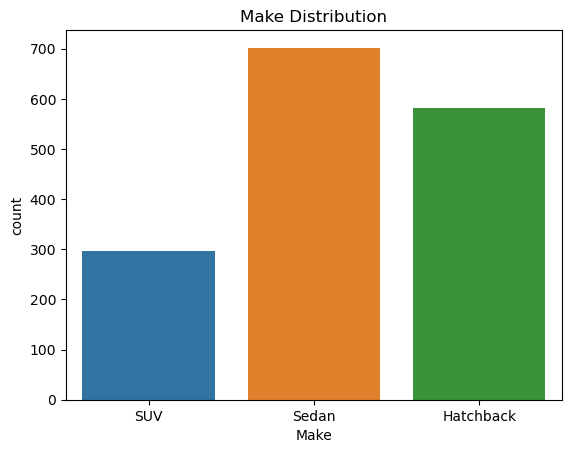

In [36]:
sns.countplot(x= 'Make', data=df)
plt.title('Make Distribution')
plt.show()

### "In our analysis of the Make of the car variable, we observed the following distribution of car types:

* Sedan: The most common car type in our dataset, accounting for 702 entries. This prevalence suggests that sedan models are popular among the individuals in our study.
* Hatchback: The second most common car type, with 582 entries. While not as dominant as sedans, hatchbacks still represent a significant portion of the data, indicating a substantial interest in this car type.
* SUV: The least common car type, with 297 entries. Despite being less prevalent than sedans and hatchbacks, SUVs still make up a considerable portion of the dataset.
##### This distribution provides valuable insights into the preferences of the individuals in our study. The dominance of sedans may reflect a general preference for traditional, versatile car models. Hatchbacks, while slightly less common, offer practicality and efficiency, making them a popular choice. SUVs, though less common, may appeal to those seeking larger vehicles with more space and utility.

In [37]:
df.select_dtypes(include=['int', 'float'])

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
0,53,4,99300,70700.000000,170000,61000
1,53,4,95500,70300.000000,165800,61000
2,53,3,97300,60700.000000,158000,57000
3,53,2,72500,70300.000000,142800,61000
4,53,3,79700,60200.000000,139900,57000
...,...,...,...,...,...,...
1576,22,2,33300,0.000000,33300,27000
1577,22,4,32000,20225.559322,32000,31000
1578,22,2,32900,0.000000,32900,30000
1579,22,3,32200,20225.559322,32200,24000


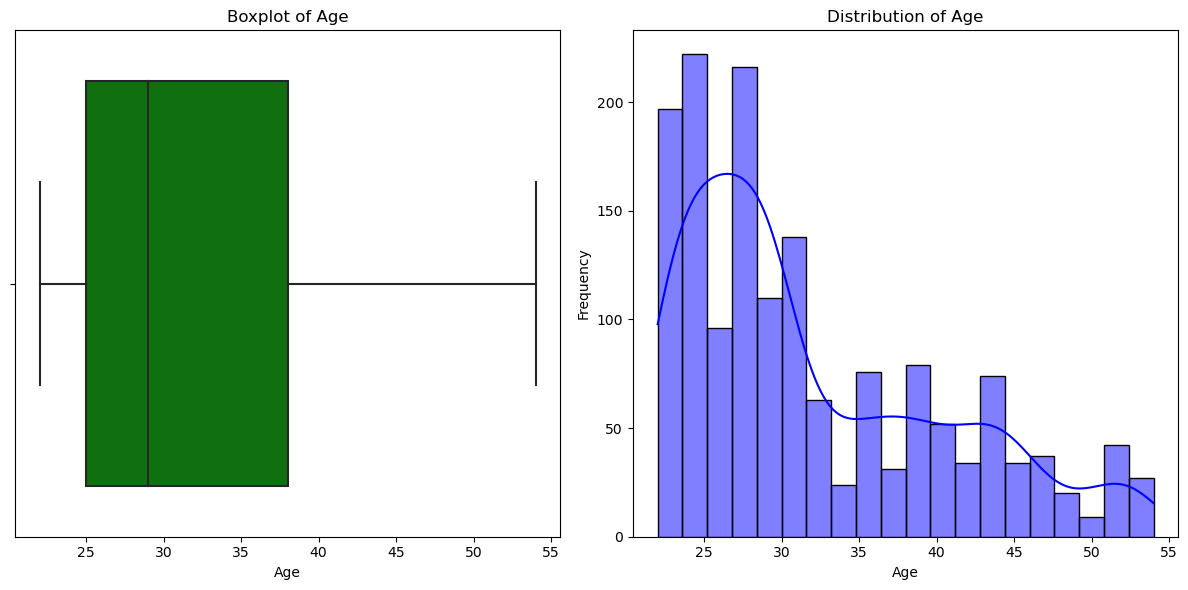

In [38]:
fig, display = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=df, x='Age', color='green', ax=display[0])
display[0].set_title('Boxplot of Age')
display[0].set_xlabel('Age')

sns.histplot(df['Age'], bins=20, kde=True, color='blue', ax=display[1])
display[1].set_title('Distribution of Age')
display[1].set_xlabel('Age')
display[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

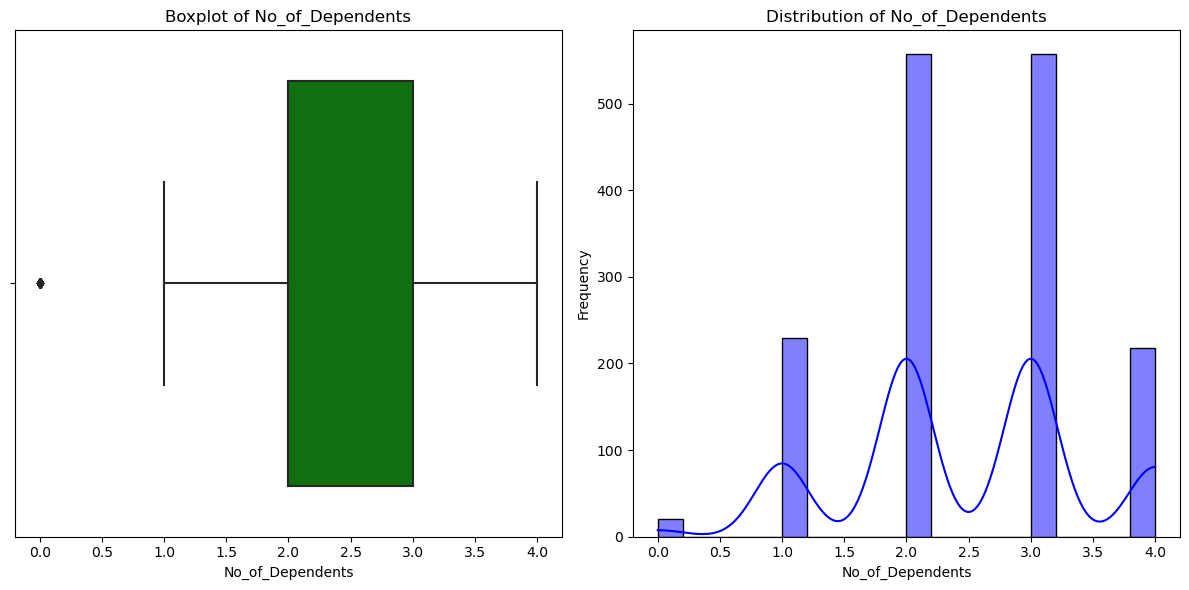

In [39]:
fig, display = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=df, x='No_of_Dependents', color='green', ax=display[0])
display[0].set_title('Boxplot of No_of_Dependents')
display[0].set_xlabel('No_of_Dependents')

sns.histplot(df['No_of_Dependents'], bins=20, kde=True, color='blue', ax=display[1])
display[1].set_title('Distribution of No_of_Dependents')
display[1].set_xlabel('No_of_Dependents')
display[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

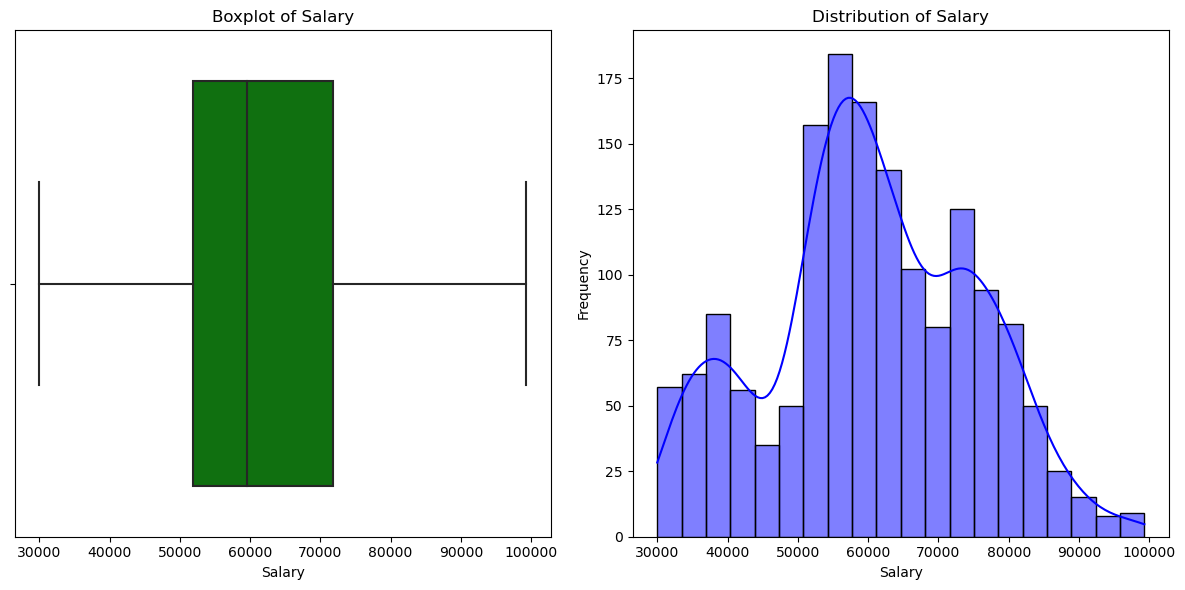

In [40]:
fig, display = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=df, x='Salary', color='green', ax=display[0])
display[0].set_title('Boxplot of Salary')
display[0].set_xlabel('Salary')

sns.histplot(df['Salary'], bins=20, kde=True, color='blue', ax=display[1])
display[1].set_title('Distribution of Salary')
display[1].set_xlabel('Salary')
display[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

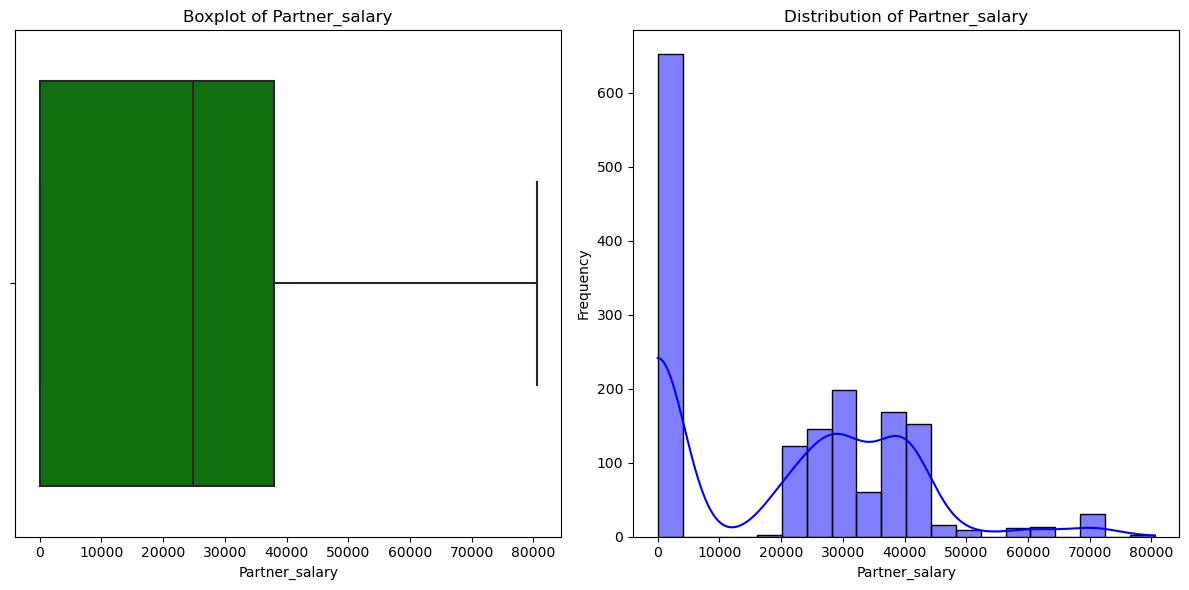

In [41]:
fig, display = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=df, x='Partner_salary', color='green', ax=display[0])
display[0].set_title('Boxplot of Partner_salary')
display[0].set_xlabel('Partner_salary')

sns.histplot(df['Partner_salary'], bins=20, kde=True, color='blue', ax=display[1])
display[1].set_title('Distribution of Partner_salary')
display[1].set_xlabel('Partner_salary')
display[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

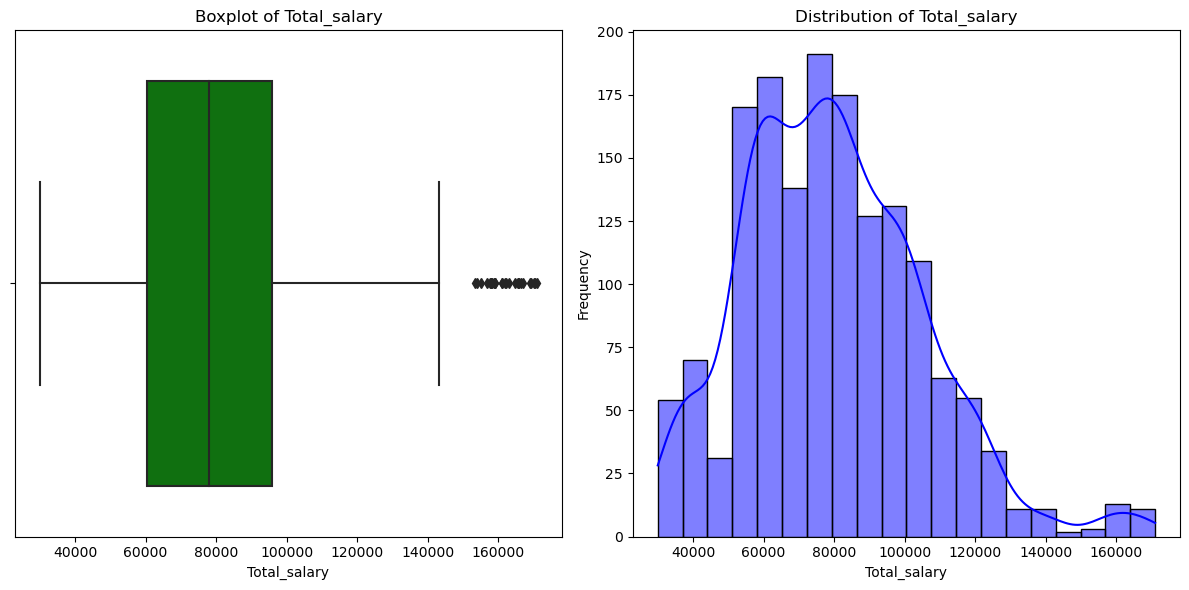

In [42]:
fig, display = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=df, x='Total_salary', color='green', ax=display[0])
display[0].set_title('Boxplot of Total_salary')
display[0].set_xlabel('Total_salary')

sns.histplot(df['Total_salary'], bins=20, kde=True, color='blue', ax=display[1])
display[1].set_title('Distribution of Total_salary')
display[1].set_xlabel('Total_salary')
display[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

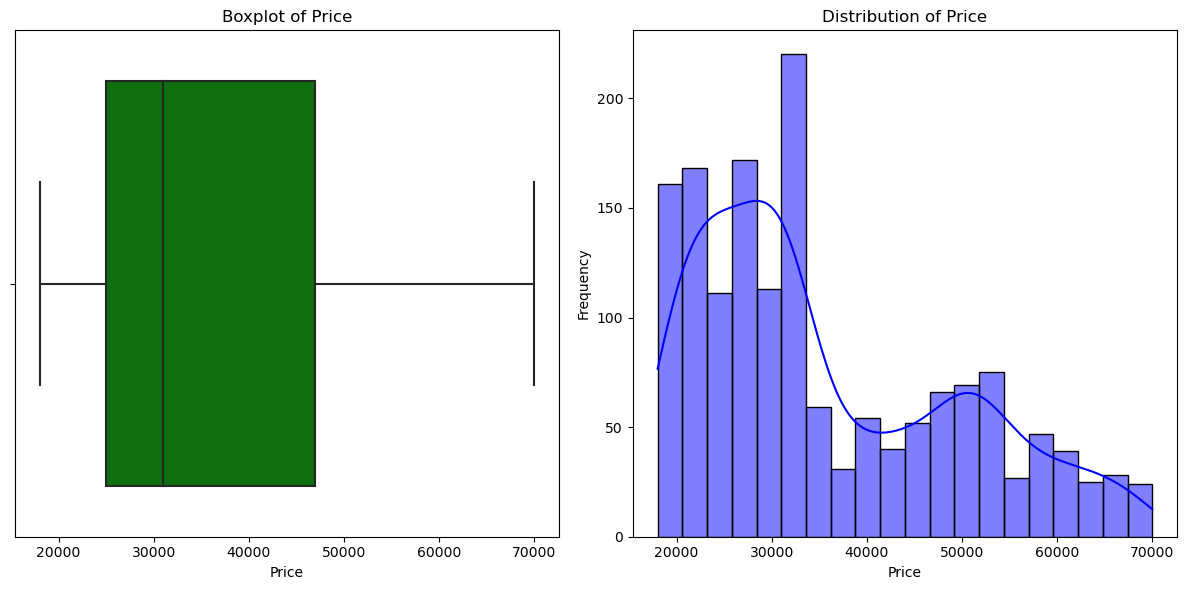

In [43]:
fig, display = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=df, x='Price', color='green', ax=display[0])
display[0].set_title('Boxplot of Price')
display[0].set_xlabel('Price')

sns.histplot(df['Price'], bins=20, kde=True, color='blue', ax=display[1])
display[1].set_title('Distribution of Price')
display[1].set_xlabel('Price')
display[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Referring to the above box plots it seems that the two variables No_of_Dependents and Total_salary have outliers present in the variables.**

### These outlier values needs to be treated and there are several ways of treating them:**
    
- **Drop the outlier value**
- **Replace the outlier value using the IQR**

### We can treat the outliers using percentile  or with Inter quartile Range
### Here, we are using percentile to replace outliers

##### Upon reviewing the No_of_Dependents variable, we have decided not to treat outliers within this variable. Although some data points fall outside the calculated bounds based on the Interquartile Range (IQR) method, these values are considered genuine and represent realistic variations in the number of dependents individuals may have. Therefore, we believe that retaining these outliers will preserve the integrity and richness of the data and provide a more accurate reflection of the underlying population distribution.

In [45]:
min_Total_salary, max_Total_salary = df['Total_salary'].quantile([0.05,0.95])
print(min_Total_salary)
print(round(max_Total_salary,2))

39400.0
122100.0


In [46]:
df["Total_salary"] = np.where(df["Total_salary"] <  min_Total_salary, min_Total_salary, df["Total_salary"])
df["Total_salary"] = np.where(df["Total_salary"] >  max_Total_salary, max_Total_salary, df["Total_salary"])

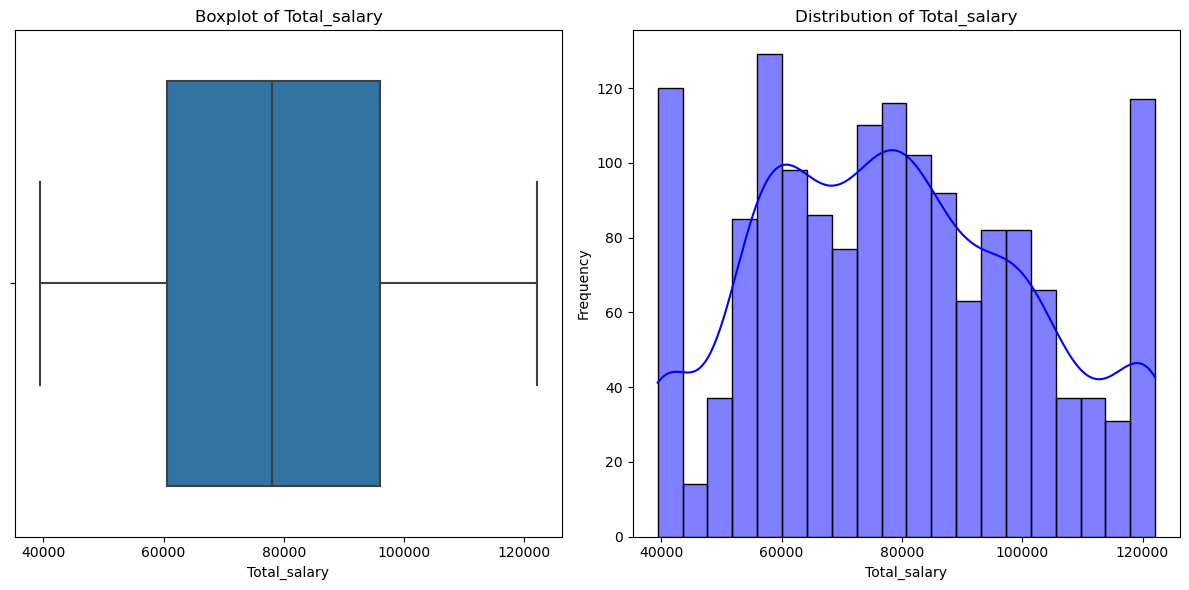

In [47]:
fig, display = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=df, x='Total_salary', ax=display[0])
display[0].set_title('Boxplot of Total_salary')
display[0].set_xlabel('Total_salary')

sns.histplot(df['Total_salary'], bins=20, kde=True, color='blue', ax=display[1])
display[1].set_title('Distribution of Total_salary')
display[1].set_xlabel('Total_salary')
display[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Here we have replaced outliers by the upper 95th and the lower 5th percentile values of the distribution
=========================================================================================================================

# Bivariate Analysis
### Explore the relationship between all numerical variables - Explore the correlation between all numerical variables - Explore the relationship between categorical vs numerical variables

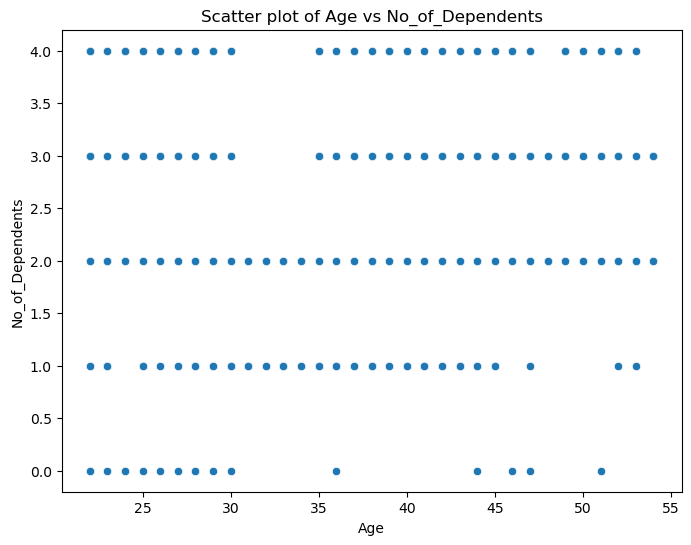

In [50]:
# Scatter plot for Age vs No_of_Dependents
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='No_of_Dependents')
plt.title('Scatter plot of Age vs No_of_Dependents')
plt.xlabel('Age')
plt.ylabel('No_of_Dependents')
plt.show()

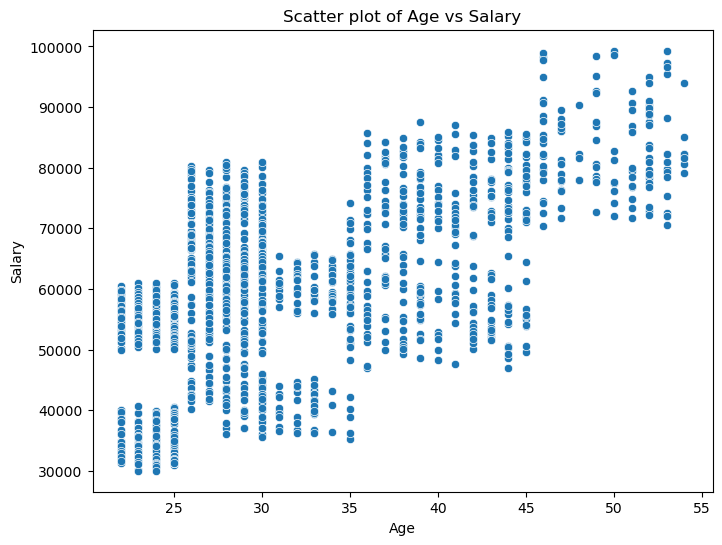

In [51]:
# Scatter plot for Age vs Salary
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Salary')
plt.title('Scatter plot of Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

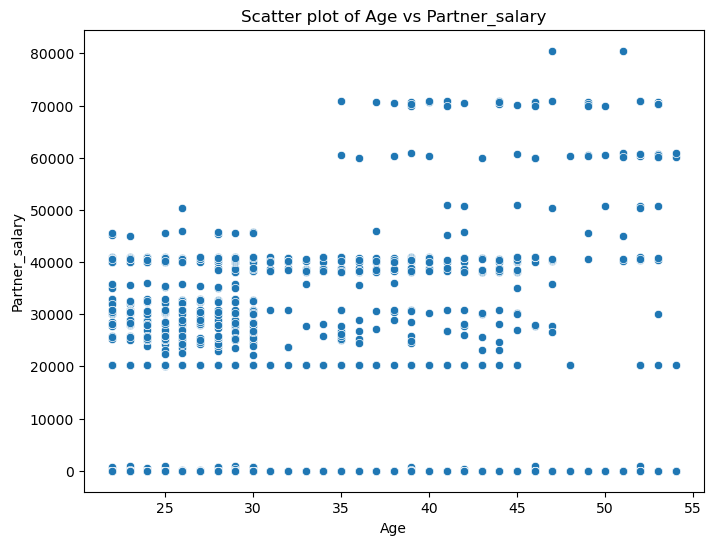

In [52]:
# Scatter plot for Age vs Partner_salary
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Partner_salary')
plt.title('Scatter plot of Age vs Partner_salary')
plt.xlabel('Age')
plt.ylabel('Partner_salary')
plt.show()

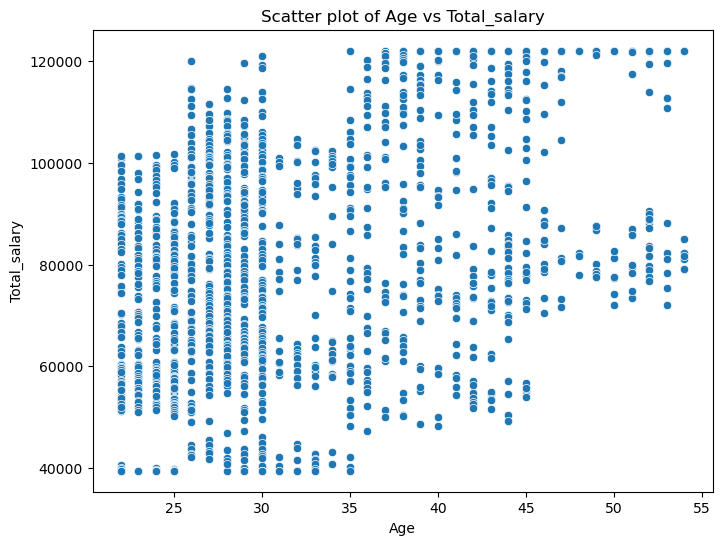

In [53]:
# Scatter plot for Age vs Total_salary
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Total_salary')
plt.title('Scatter plot of Age vs Total_salary')
plt.xlabel('Age')
plt.ylabel('Total_salary')
plt.show()

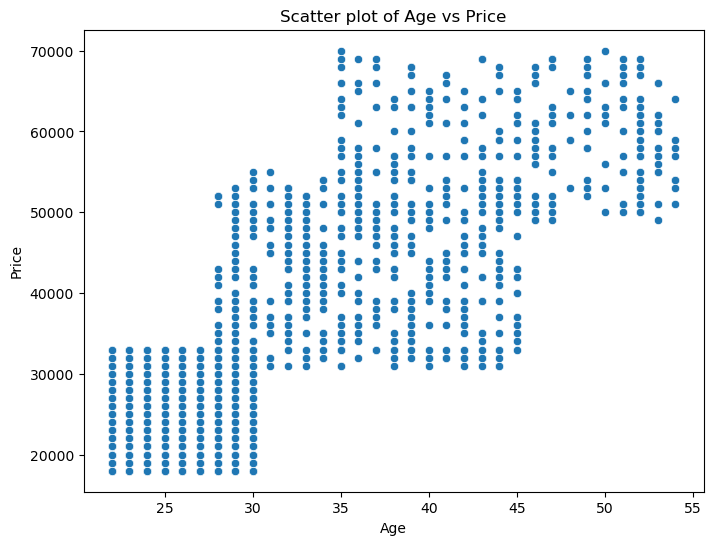

In [54]:
# Scatter plot for Age vs Price
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Price')
plt.title('Scatter plot of Age vs Price')
plt.xlabel('Age')
plt.ylabel('Price')
plt.show()

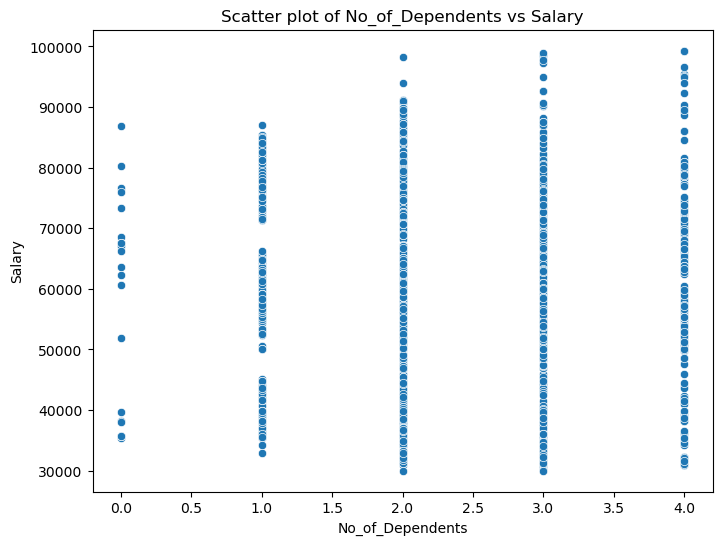

In [55]:
# Scatter plot for No_of_Dependents vs Salary
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='No_of_Dependents', y='Salary')
plt.title('Scatter plot of No_of_Dependents vs Salary')
plt.xlabel('No_of_Dependents')
plt.ylabel('Salary')
plt.show()

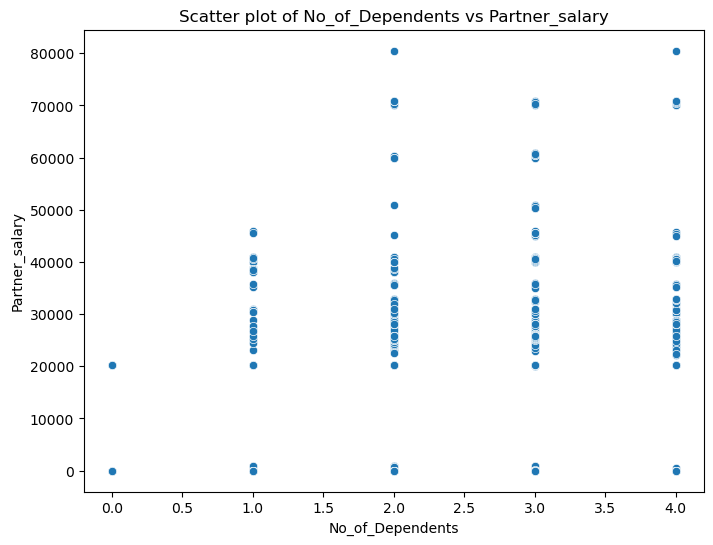

In [56]:
# Scatter plot for No_of_Dependents vs Partner_salary
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='No_of_Dependents', y='Partner_salary')
plt.title('Scatter plot of No_of_Dependents vs Partner_salary')
plt.xlabel('No_of_Dependents')
plt.ylabel('Partner_salary')
plt.show()

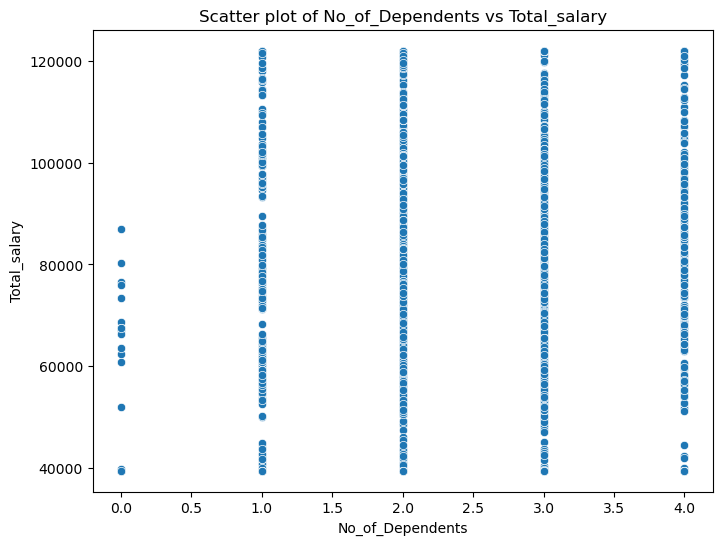

In [57]:
# Scatter plot for No_of_Dependents vs Total_salary
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='No_of_Dependents', y='Total_salary')
plt.title('Scatter plot of No_of_Dependents vs Total_salary')
plt.xlabel('No_of_Dependents')
plt.ylabel('Total_salary')
plt.show()

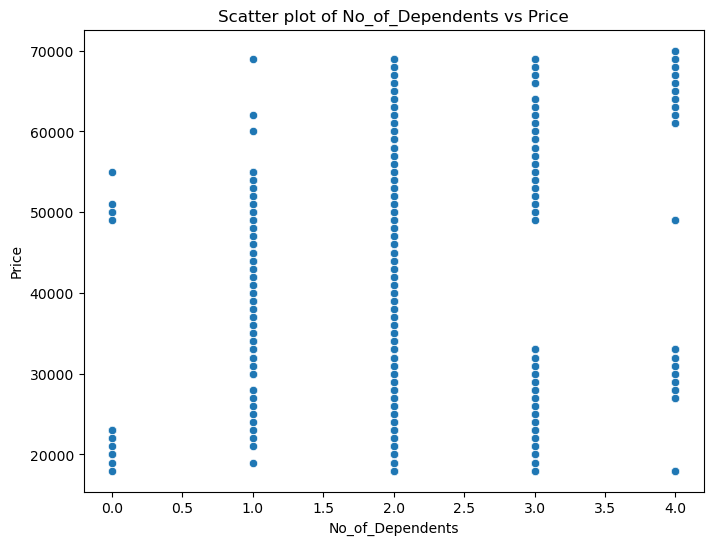

In [61]:
# Scatter plot for No_of_Dependents vs Price
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='No_of_Dependents', y='Price')
plt.title('Scatter plot of No_of_Dependents vs Price')
plt.xlabel('No_of_Dependents')
plt.ylabel('Price')
plt.show()

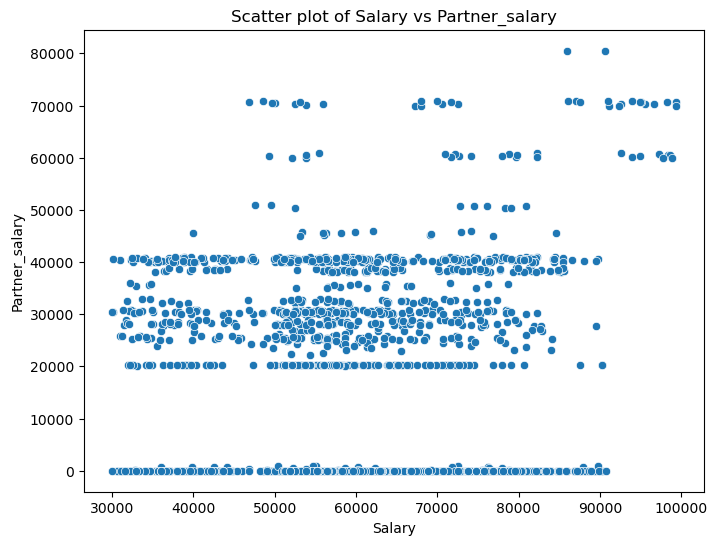

In [60]:
# Scatter plot for Salary vs Partner_salary
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Salary', y='Partner_salary')
plt.title('Scatter plot of Salary vs Partner_salary')
plt.xlabel('Salary')
plt.ylabel('Partner_salary')
plt.show()

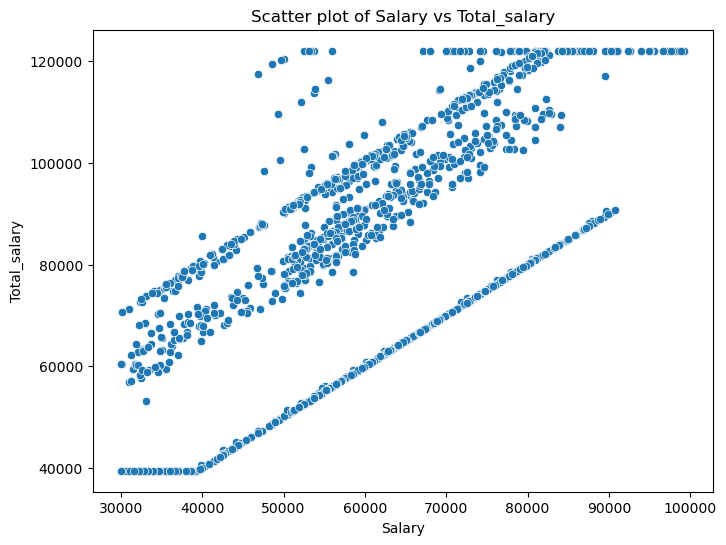

In [62]:
# Scatter plot for Salary vs Total_salary
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Salary', y='Total_salary')
plt.title('Scatter plot of Salary vs Total_salary')
plt.xlabel('Salary')
plt.ylabel('Total_salary')
plt.show()

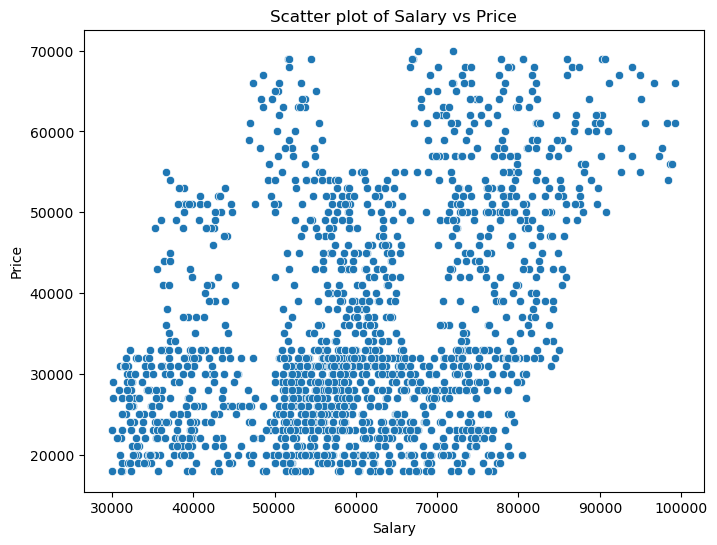

In [63]:
# Scatter plot for Salary vs Price
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Salary', y='Price')
plt.title('Scatter plot of Salary vs Price')
plt.xlabel('Salary')
plt.ylabel('Price')
plt.show()

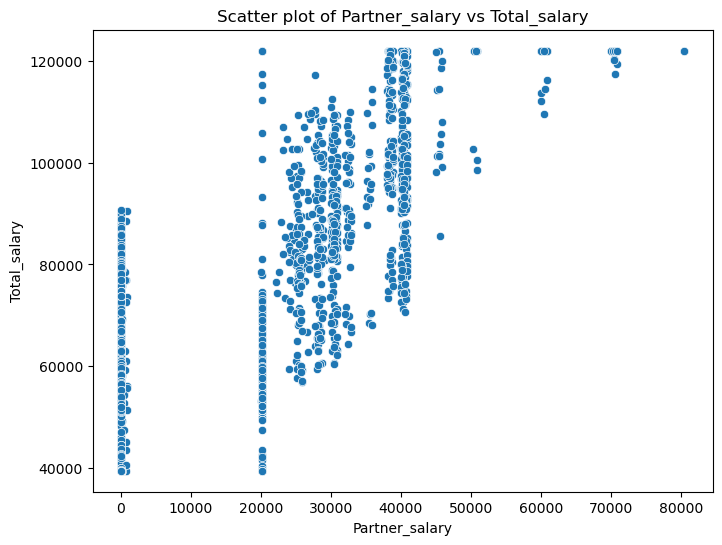

In [64]:
# Scatter plot for Partner_salary vs Total_salary
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Partner_salary', y='Total_salary')
plt.title('Scatter plot of Partner_salary vs Total_salary')
plt.xlabel('Partner_salary')
plt.ylabel('Total_salary')
plt.show()

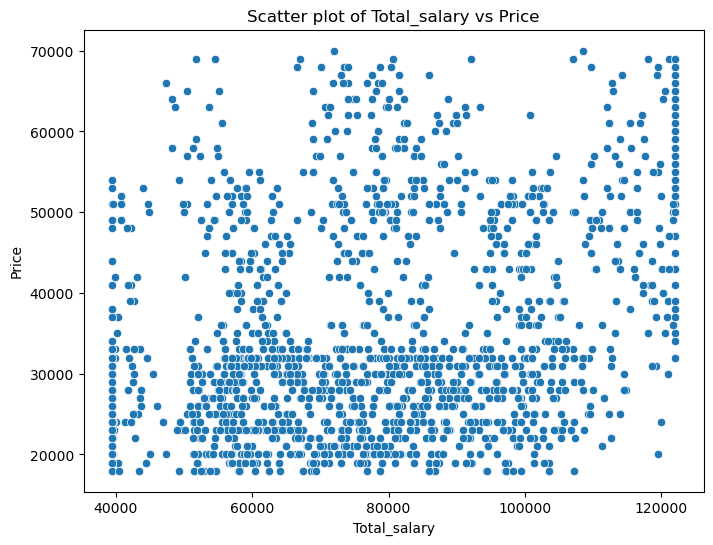

In [66]:
# Scatter plot for Total_salary vs Price
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Total_salary', y='Price')
plt.title('Scatter plot of Total_salary vs Price')
plt.xlabel('Total_salary')
plt.ylabel('Price')
plt.show()

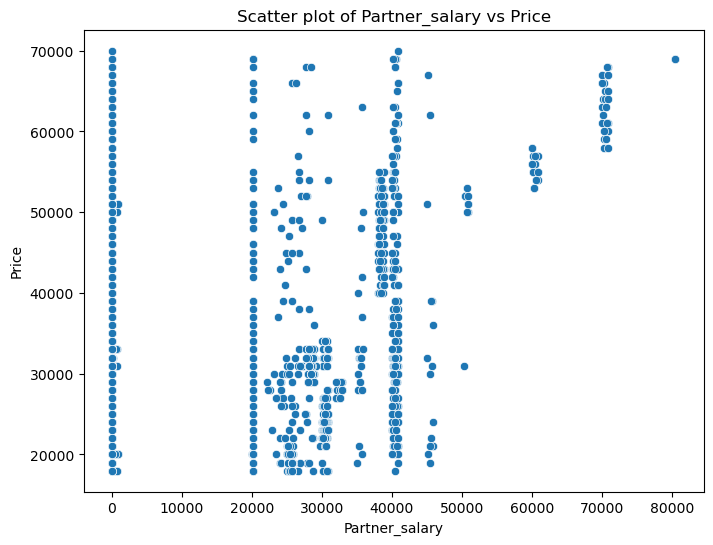

In [65]:
# Scatter plot for Partner_salary vs Price
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Partner_salary', y='Price')
plt.title('Scatter plot of Partner_salary vs Price')
plt.xlabel('Partner_salary')
plt.ylabel('Price')
plt.show()

In [48]:
corr = df.corr(numeric_only=True)
corr

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
Age,1.000000,-0.189614,0.616899,0.122320,0.422814,0.797831
No_of_Dependents,-0.189614,1.000000,-0.031746,0.125779,0.076794,-0.135839
Salary,0.616899,-0.031746,1.000000,0.069002,0.619913,0.409920
Partner_salary,0.122320,0.125779,0.069002,1.000000,0.768736,0.161521
Total_salary,0.422814,0.076794,0.619913,0.768736,1.000000,0.328781
Price,0.797831,-0.135839,0.409920,0.161521,0.328781,1.000000


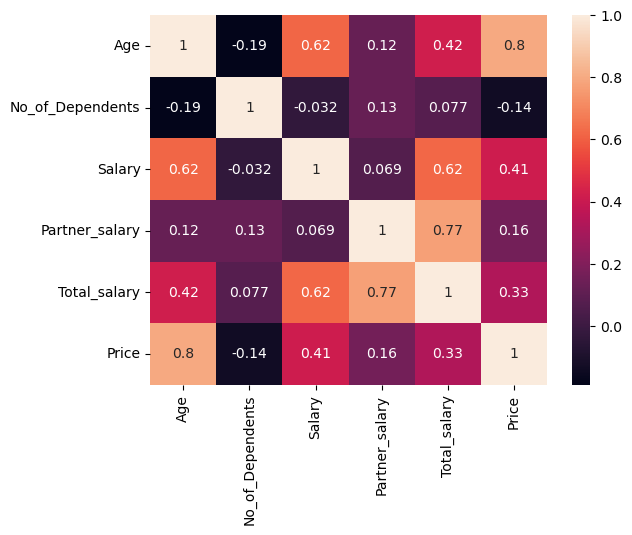

In [49]:
sns.heatmap(corr, annot=True);

## In the analysis, we utilized a heatmap to visualize the correlation matrix of our numerical variables, including Age, No_of_Dependents, Salary, Partner_salary, Total_salary, and Price. The heatmap provided a clear representation of the relationships between each pair of variables, allowing us to quickly assess the strength and direction of their linear relationships.

### Upon reviewing the heatmap, we identified several noteworthy patterns:

##### Strong Positive Correlations: The heatmap shows a strong positive correlation between several pairs of variables, particularly between Salary and Total_salary. This correlation is expected, as Total_salary includes Salary as a component. This relationship suggests that as Salary increases, so does Total_salary, which is a logical outcome.

##### Moderate Positive Correlations: There appears to be a moderate positive correlation between Age and Salary, suggesting that as individuals age, their salary tends to increase. This trend aligns with the general expectation that salaries rise with experience and tenure.

##### Weak or No Correlation: The heatmap shows weak or negligible correlations between some variables, such as between No_of_Dependents and Partner_salary. This indicates that the number of dependents an individual has may not have a significant impact on their partner's salary.
=================================================================================================================

 ### Explore the relationship between categorical vs numerical variables


In [67]:
df_num = df.select_dtypes(include=np.number)
df_num.head()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
0,53,4,99300,70700.0,122100.0,61000
1,53,4,95500,70300.0,122100.0,61000
2,53,3,97300,60700.0,122100.0,57000
3,53,2,72500,70300.0,122100.0,61000
4,53,3,79700,60200.0,122100.0,57000


In [68]:
df_num.columns

Index(['Age', 'No_of_Dependents', 'Salary', 'Partner_salary', 'Total_salary',
       'Price'],
      dtype='object')

In [69]:
df_cat = df.select_dtypes(exclude=np.number)
df_cat.head()

,Gender,Profession,Marital_status,Education,Personal_loan,House_loan,Partner_working,Make
0,Male,Business,Married,Post Graduate,No,No,Yes,SUV
1,Female,Salaried,Married,Post Graduate,Yes,No,Yes,SUV
2,Female,Salaried,Married,Post Graduate,No,No,Yes,SUV
3,Female,Salaried,Married,Graduate,Yes,No,Yes,SUV
4,Male,Salaried,Married,Post Graduate,No,No,Yes,SUV


In [70]:
df_cat.columns

Index(['Gender', 'Profession', 'Marital_status', 'Education', 'Personal_loan',
       'House_loan', 'Partner_working', 'Make'],
      dtype='object')

In [71]:
grouped_data = df.groupby('Gender')
numerical_columns = ['Age', 'No_of_Dependents', 'Salary', 'Partner_salary', 'Total_salary', 'Price']
summary_stats = grouped_data[numerical_columns].agg(['mean', 'median', 'std'])
summary_stats

Age                  No_of_Dependents                   \
             mean median       std             mean median       std   
Gender                                                                 
Female  39.525836   39.0  7.412093         2.039514    2.0  0.924738   
Male    29.924121   28.0  7.487575         2.567891    3.0  0.917556   

              Salary                        Partner_salary           \
                mean   median           std           mean   median   
Gender                                                                
Female  66194.528875  64600.0  14577.401713   23072.381227  24900.0   
Male    58867.492013  58500.0  14320.934544   19477.472735  24950.0   

                      Total_salary                                Price  \
                 std          mean   median           std          mean   
Gender                                                                    
Female  22220.658707  86288.753799  84000.0  24291.113525  47705.167173   
Male    17867.572242  76949.680511  76100.0  22071.823205  32416.134185   

                               
         median           std  
Gender                         
Female  49000.0  11244.836378  
Male    29000.0  12366.253107

In [72]:
grouped_data = df.groupby('Profession')
numerical_columns = ['Age', 'No_of_Dependents', 'Salary', 'Partner_salary', 'Total_salary', 'Price']
summary_stats = grouped_data[numerical_columns].agg(['mean', 'median', 'std'])
summary_stats

Age                  No_of_Dependents                   \
                 mean median       std             mean median       std   
Profession                                                                 
Business    30.563504   28.0  7.808798         2.490511    3.0  0.931254   
Salaried    32.960938   30.0  8.731605         2.433036    2.0  0.952493   

                  Salary                        Partner_salary           \
                    mean   median           std           mean   median   
Profession                                                                
Business    59578.978102  59300.0  14286.122641   19841.091872  25000.0   
Salaried    61013.950893  59800.0  14943.266102   20519.488120  24350.0   

                          Total_salary                                Price  \
                     std          mean   median           std          mean   
Profession                                                                    
Business    18197.800397  78210.948905  77700.0  22145.393033  33353.284672   
Salaried    19433.582215  79414.620536  78000.0  23391.204441  37313.616071   

                                   
             median           std  
Profession                         
Business    30000.0  12911.331955  
Salaried    33000.0  13926.016563

In [73]:
grouped_data = df.groupby('Marital_status')
numerical_columns = ['Age', 'No_of_Dependents', 'Salary', 'Partner_salary', 'Total_salary', 'Price']
summary_stats = grouped_data[numerical_columns].agg(['mean', 'median', 'std'])
summary_stats

Age                  No_of_Dependents                   \
                     mean median       std             mean median       std   
Marital_status                                                                 
Married         31.995842   29.0  8.433717         2.539155    3.0  0.921517   
Single          31.152174   28.0  8.335924         1.608696    2.0  0.729311   

                      Salary                        Partner_salary           \
                        mean   median           std           mean   median   
Marital_status                                                                
Married         60412.404712  59300.0  14599.913266   21935.551170  25800.0   
Single          60181.159420  60900.0  15490.512994    2344.992385      0.0   

                              Total_salary                         \
                         std          mean   median           std   
Marital_status                                                      
Married         18816.860889  80609.009009  79800.0  22795.314306   
Single           6498.911462  60950.724638  60900.0  14227.157368   

                      Price                         
                       mean   median           std  
Marital_status                                      
Married         35800.41580  32000.0  13723.202856  
Single          33478.26087  30000.0  12509.393487

In [74]:
grouped_data = df.groupby('Education')
numerical_columns = ['Age', 'No_of_Dependents', 'Salary', 'Partner_salary', 'Total_salary', 'Price']
summary_stats = grouped_data[numerical_columns].agg(['mean', 'median', 'std'])
summary_stats

Age                  No_of_Dependents                   \
                    mean median       std             mean median       std   
Education                                                                     
Graduate       31.843960   29.0  8.251966         2.441275    2.0  0.949962   
Post Graduate  31.969543   29.0  8.533357         2.468020    2.0  0.939881   

                     Salary                        Partner_salary           \
                       mean   median           std           mean   median   
Education                                                                    
Graduate       48506.040268  47550.0  12480.532623   21276.258674  25300.0   
Post Graduate  67584.263959  65800.0  10688.737619   19589.806212  23800.0   

                             Total_salary                         \
                        std          mean   median           std   
Education                                                          
Graduate       19118.517272  68749.496644  67900.0  22645.954240   
Post Graduate  18756.091922  85030.761421  83700.0  20712.347019   

                      Price                         
                       mean   median           std  
Education                                           
Graduate       35907.718121  31000.0  13997.594301  
Post Graduate  35410.152284  31000.0  13412.328181

In [75]:
grouped_data = df.groupby('Personal_loan')
numerical_columns = ['Age', 'No_of_Dependents', 'Salary', 'Partner_salary', 'Total_salary', 'Price']
summary_stats = grouped_data[numerical_columns].agg(['mean', 'median', 'std'])
summary_stats

Age                  No_of_Dependents                   \
                    mean median       std             mean median       std   
Personal_loan                                                                 
No             32.518378   29.0  8.907376         2.552598    3.0  0.917309   
Yes            31.328283   29.0  7.878233         2.363636    2.0  0.960189   

                     Salary                        Partner_salary           \
                       mean   median           std           mean   median   
Personal_loan                                                                
No             61248.288973  60900.0  15269.018689   20802.191489  25100.0   
Yes            59539.393939  58900.0  14015.653652   19651.111368  24250.0   

                             Total_salary                         \
                        std          mean   median           std   
Personal_loan                                                      
No             19661.496271  79900.000000  78800.0  23601.269001   
Yes            18114.577478  77890.025253  76850.0  22066.960252   

                      Price                         
                       mean   median           std  
Personal_loan                                       
No             36742.712294  32000.0  14534.344526  
Yes            34457.070707  31000.0  12578.780338

In [76]:
grouped_data = df.groupby('House_loan')
numerical_columns = ['Age', 'No_of_Dependents', 'Salary', 'Partner_salary', 'Total_salary', 'Price']
summary_stats = grouped_data[numerical_columns].agg(['mean', 'median', 'std'])
summary_stats

Age                  No_of_Dependents                   \
                 mean median       std             mean median       std   
House_loan                                                                 
No          33.068311   30.0  9.219240         2.472486    2.0  0.937102   
Yes         29.629981   28.0  5.934184         2.428843    2.0  0.956349   

                  Salary                        Partner_salary           \
                    mean   median           std           mean   median   
House_loan                                                                
No          61590.037951  60400.0  15182.327952   20646.031261  24200.0   
Yes         57996.584440  58400.0  13296.651416   19384.615444  25100.0   

                          Total_salary                                Price  \
                     std          mean   median           std          mean   
House_loan                                                                    
No          19803.908651  80038.425047  79000.0  23262.006443  37707.779886   
Yes         16952.253081  76602.466793  75400.0  21877.570975  31377.609108   

                                   
             median           std  
House_loan                         
No          32000.0  14816.702037  
Yes         30000.0   9596.008338

In [77]:
grouped_data = df.groupby('Partner_working')
numerical_columns = ['Age', 'No_of_Dependents', 'Salary', 'Partner_salary', 'Total_salary', 'Price']
summary_stats = grouped_data[numerical_columns].agg(['mean', 'median', 'std'])
summary_stats

Age                  No_of_Dependents                   \
                     mean median       std             mean median       std   
Partner_working                                                                
No               32.13885   29.0  8.518260         2.305750    2.0  0.988236   
Yes              31.74424   29.0  8.350125         2.582949    3.0  0.886284   

                       Salary                        Partner_salary           \
                         mean   median           std           mean   median   
Partner_working                                                                
No               60527.208976  60100.0  14155.715691    2553.015903      0.0   
Yes              60281.336406  59050.0  15095.104030   34742.291416  32700.0   

                               Total_salary                         \
                          std          mean   median           std   
Partner_working                                                      
No                6721.729895  60974.333801  60100.0  13363.171568   
Yes              12099.662480  93612.096774  94250.0  18021.477734   

                        Price                         
                         mean   median           std  
Partner_working                                       
No               36000.000000  31000.0  13817.734086  
Yes              35267.281106  31000.0  13479.532555

In [78]:
grouped_data = df.groupby('Make')
numerical_columns = ['Age', 'No_of_Dependents', 'Salary', 'Partner_salary', 'Total_salary', 'Price']
summary_stats = grouped_data[numerical_columns].agg(['mean', 'median', 'std'])
summary_stats

Age                  No_of_Dependents                   \
                mean median       std             mean median       std   
Make                                                                      
Hatchback  25.726804   26.0  2.500796         2.778351    3.0  0.880470   
SUV        43.989899   45.0  6.664491         2.609428    3.0  0.966838   
Sedan      31.952991   30.0  6.520400         2.128205    2.0  0.874803   

                 Salary                        Partner_salary                \
                   mean   median           std           mean        median   
Make                                                                          
Hatchback  55083.505155  56100.0  13084.408983   17347.380977  20225.559322   
SUV        72266.666667  74000.0  14252.816222   24665.686697  20225.559322   
Sedan      59769.658120  59800.0  13197.894815   20733.225940  25400.000000   

                         Total_salary                                Price  \
                    std          mean   median           std          mean   
Make                                                                         
Hatchback  15868.245319  71465.635739  70450.0  20258.126553  26474.226804   
SUV        26254.526008  91685.521886  87600.0  24209.141376  55824.915825   
Sedan      17038.793915  79638.746439  78750.0  21785.100265  34603.988604   

                                  
            median           std  
Make                              
Hatchback  27000.0   4290.467640  
SUV        57000.0   9218.242714  
Sedan      33000.0  11152.164304

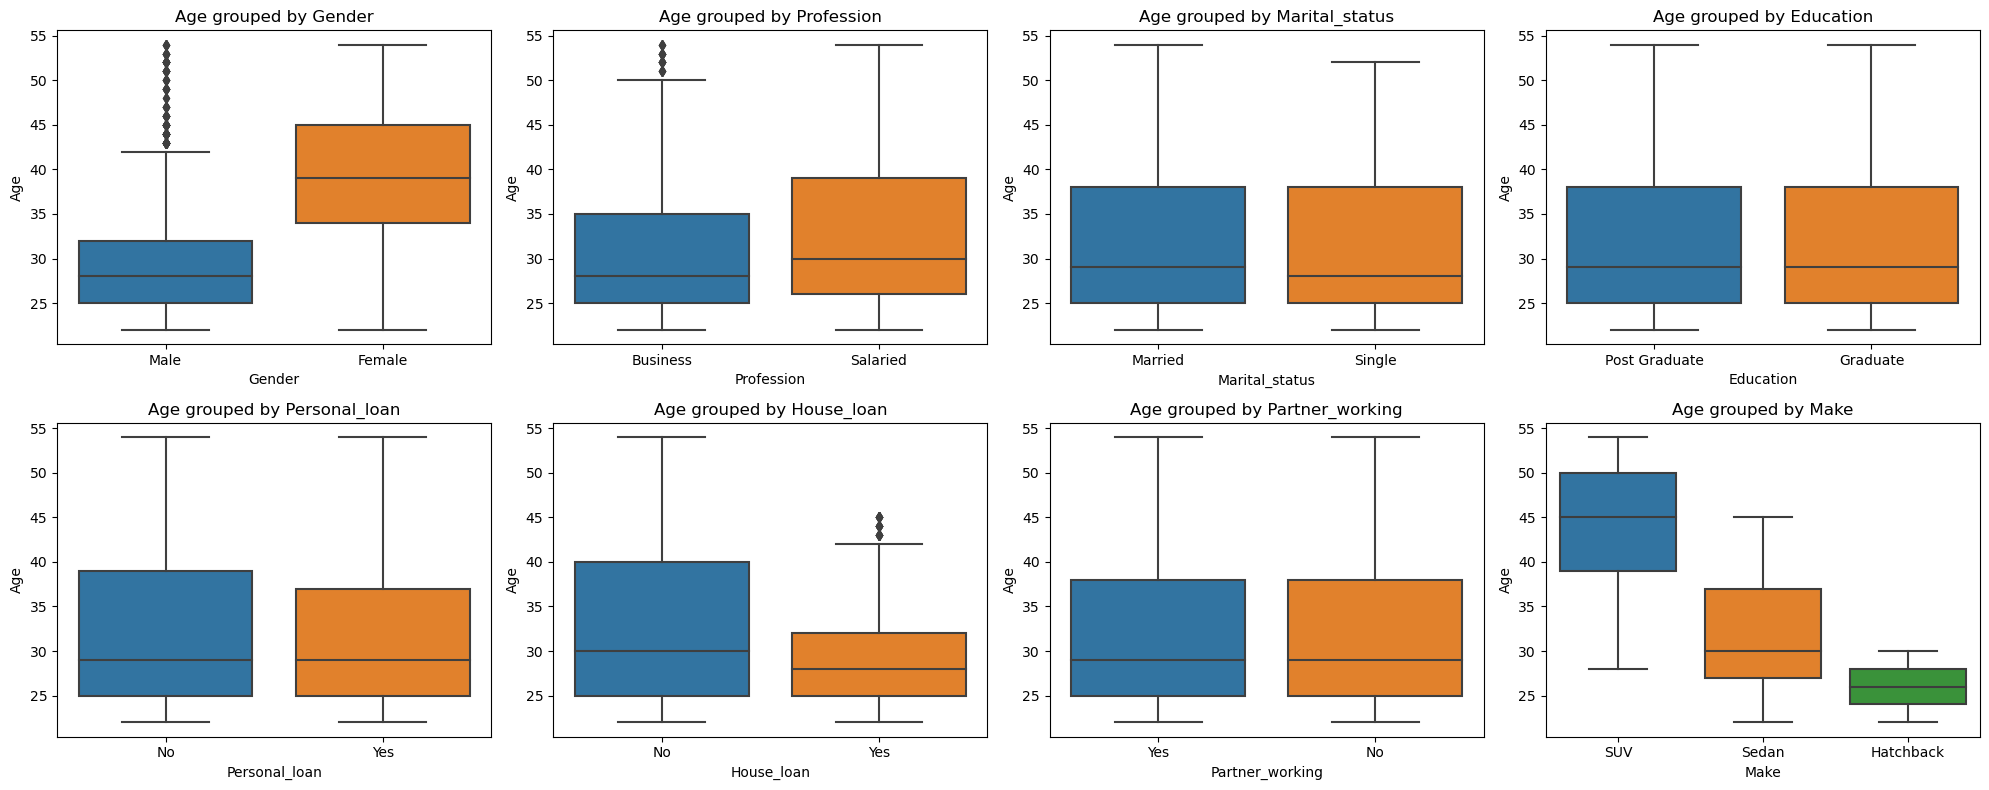

In [79]:
cat_vars = ['Gender', 'Profession', 'Marital_status', 'Education', 'Personal_loan', 'House_loan', 'Partner_working', 'Make']  # Categorical variables
num_var = 'Age'
num_cats = len(cat_vars)
cols = 4
rows = (num_cats + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4), sharey=False)
axes = axes.flatten() if rows > 1 else [axes]
for i, cat_var in enumerate(cat_vars):
    sns.boxplot(x=cat_var, y=num_var, data=df, ax=axes[i])
    axes[i].set_title(f'{num_var} grouped by {cat_var}')
    axes[i].set_xlabel(cat_var)
    axes[i].set_ylabel(num_var)
plt.tight_layout()
plt.show()

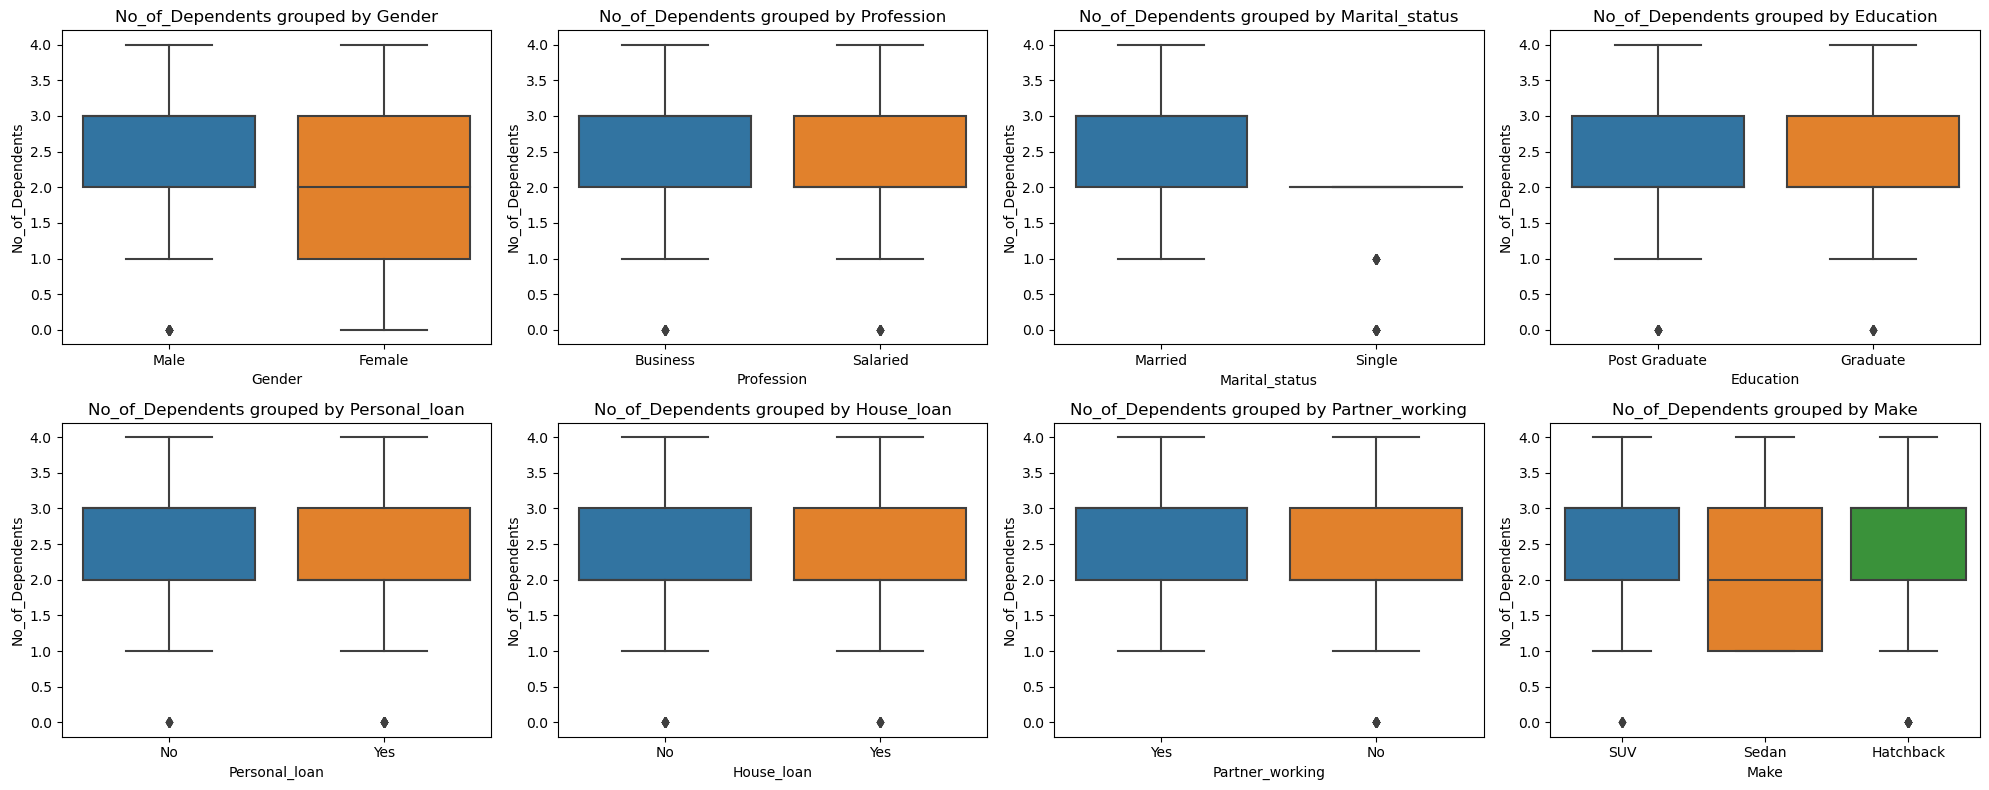

In [80]:
cat_vars = ['Gender', 'Profession', 'Marital_status', 'Education', 'Personal_loan', 'House_loan', 'Partner_working', 'Make']
num_var = 'No_of_Dependents'
num_cats = len(cat_vars)
cols = 4
rows = (num_cats + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4), sharey=False)
axes = axes.flatten() if rows > 1 else [axes]
for i, cat_var in enumerate(cat_vars):
    sns.boxplot(x=cat_var, y=num_var, data=df, ax=axes[i])
    axes[i].set_title(f'{num_var} grouped by {cat_var}')
    axes[i].set_xlabel(cat_var)
    axes[i].set_ylabel(num_var)
plt.tight_layout()
plt.show()

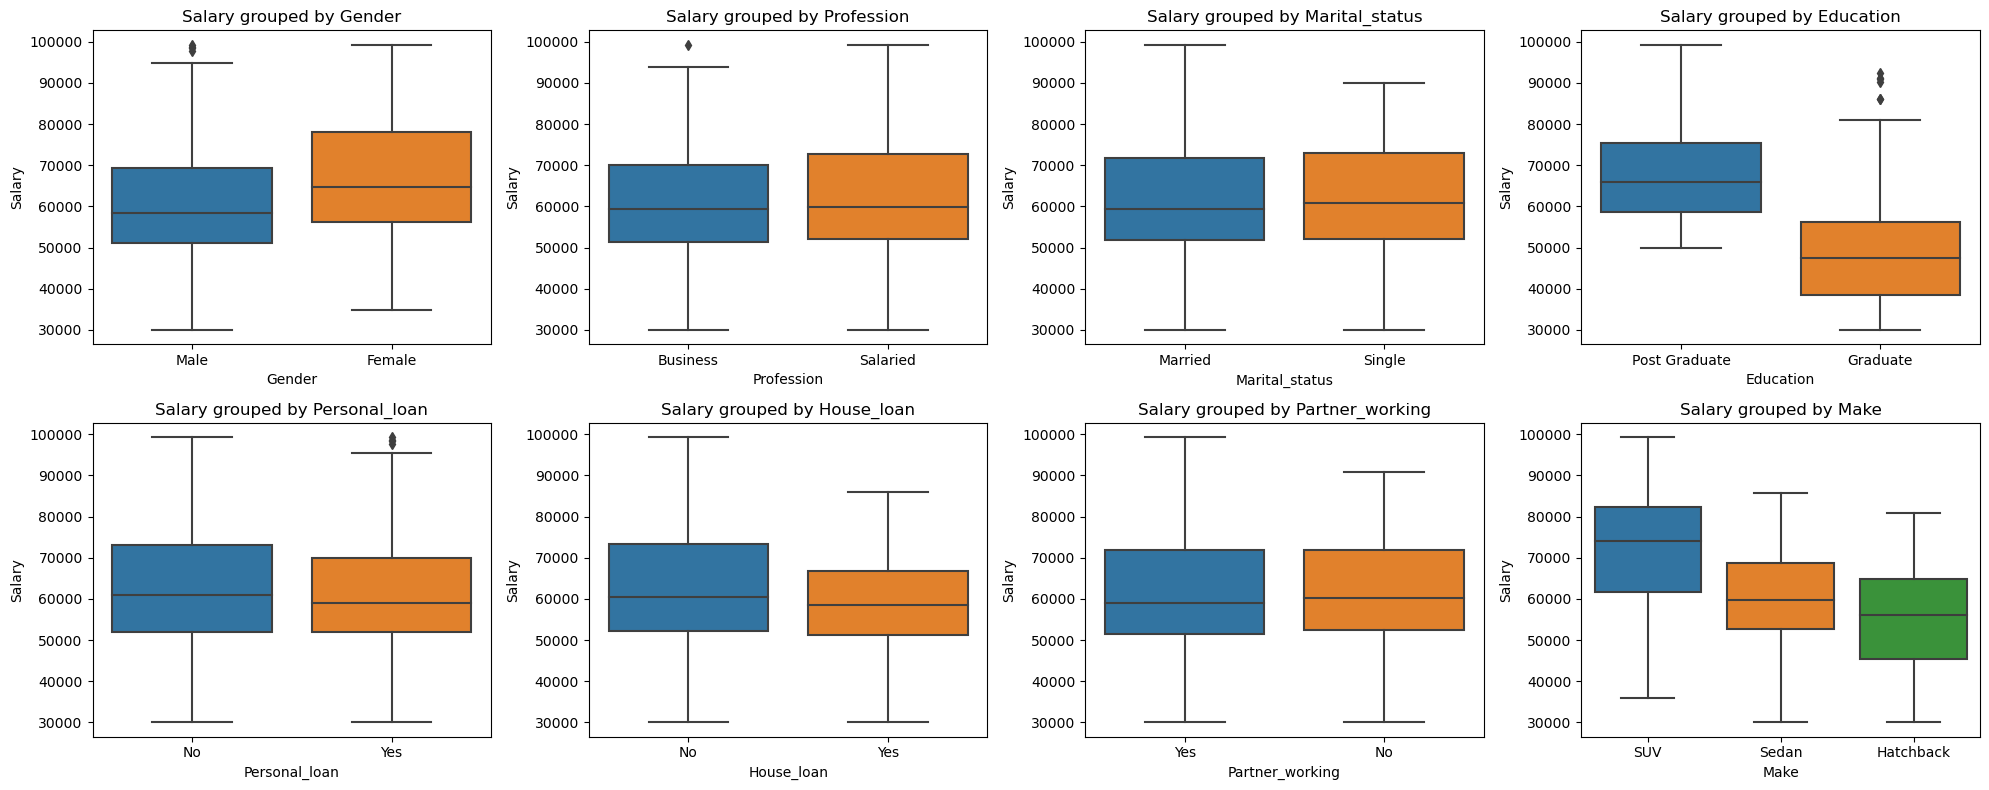

In [81]:
cat_vars = ['Gender', 'Profession', 'Marital_status', 'Education', 'Personal_loan', 'House_loan', 'Partner_working', 'Make']
num_var = 'Salary'
num_cats = len(cat_vars)
cols = 4
rows = (num_cats + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4), sharey=False)
axes = axes.flatten() if rows > 1 else [axes]
for i, cat_var in enumerate(cat_vars):
    sns.boxplot(x=cat_var, y=num_var, data=df, ax=axes[i])
    axes[i].set_title(f'{num_var} grouped by {cat_var}')
    axes[i].set_xlabel(cat_var)
    axes[i].set_ylabel(num_var)
plt.tight_layout()
plt.show()

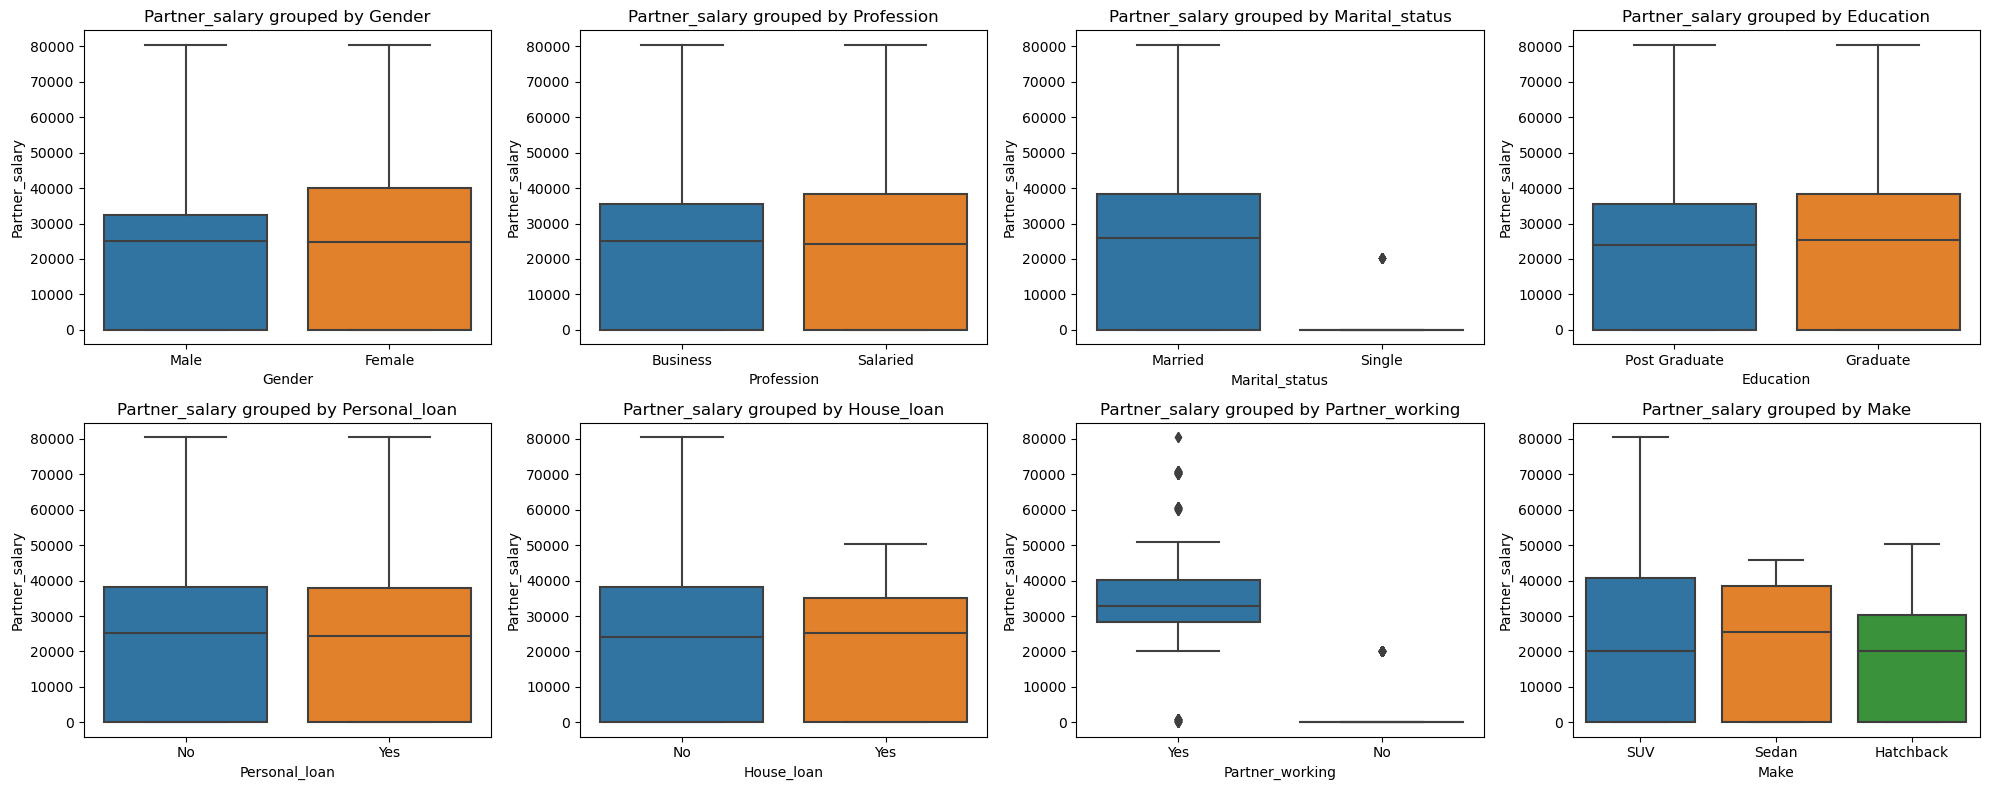

In [82]:
cat_vars = ['Gender', 'Profession', 'Marital_status', 'Education', 'Personal_loan', 'House_loan', 'Partner_working', 'Make']
num_var = 'Partner_salary'
num_cats = len(cat_vars)
cols = 4
rows = (num_cats + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4), sharey=False)
axes = axes.flatten() if rows > 1 else [axes]
for i, cat_var in enumerate(cat_vars):
    sns.boxplot(x=cat_var, y=num_var, data=df, ax=axes[i])
    axes[i].set_title(f'{num_var} grouped by {cat_var}')
    axes[i].set_xlabel(cat_var)
    axes[i].set_ylabel(num_var)
plt.tight_layout()
plt.show()

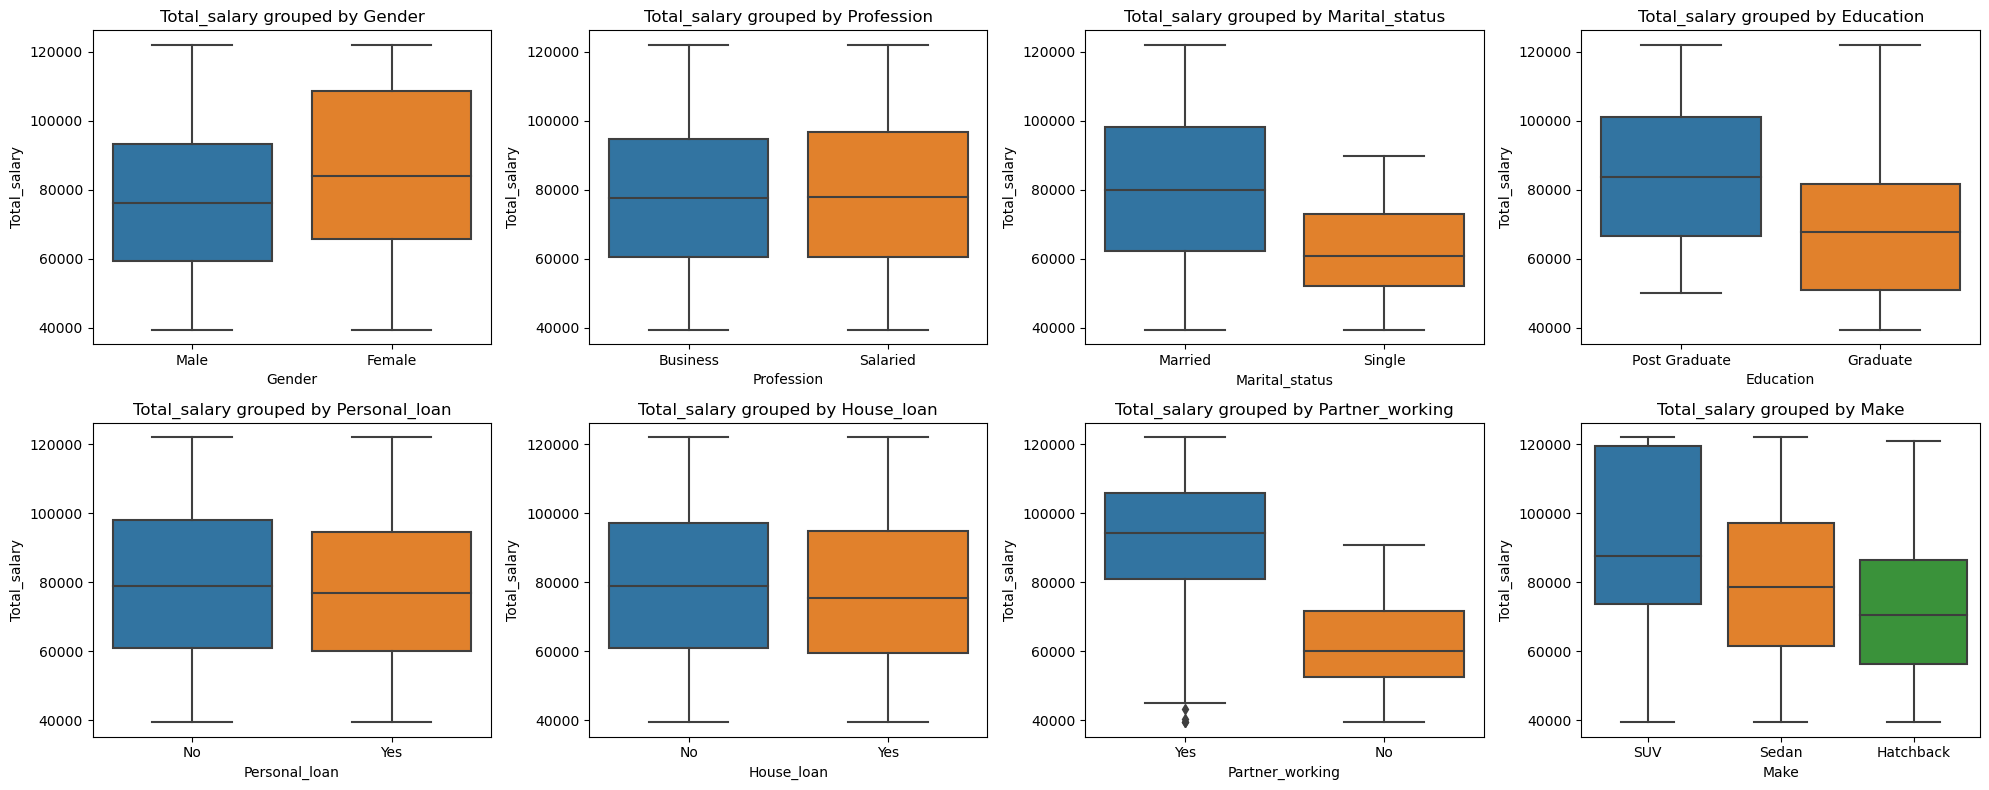

In [83]:
cat_vars = ['Gender', 'Profession', 'Marital_status', 'Education', 'Personal_loan', 'House_loan', 'Partner_working', 'Make']

num_var = 'Total_salary'
num_cats = len(cat_vars)
cols = 4
rows = (num_cats + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4), sharey=False)
axes = axes.flatten() if rows > 1 else [axes]
for i, cat_var in enumerate(cat_vars):
    sns.boxplot(x=cat_var, y=num_var, data=df, ax=axes[i])
    axes[i].set_title(f'{num_var} grouped by {cat_var}')
    axes[i].set_xlabel(cat_var)
    axes[i].set_ylabel(num_var)
plt.tight_layout()
plt.show()

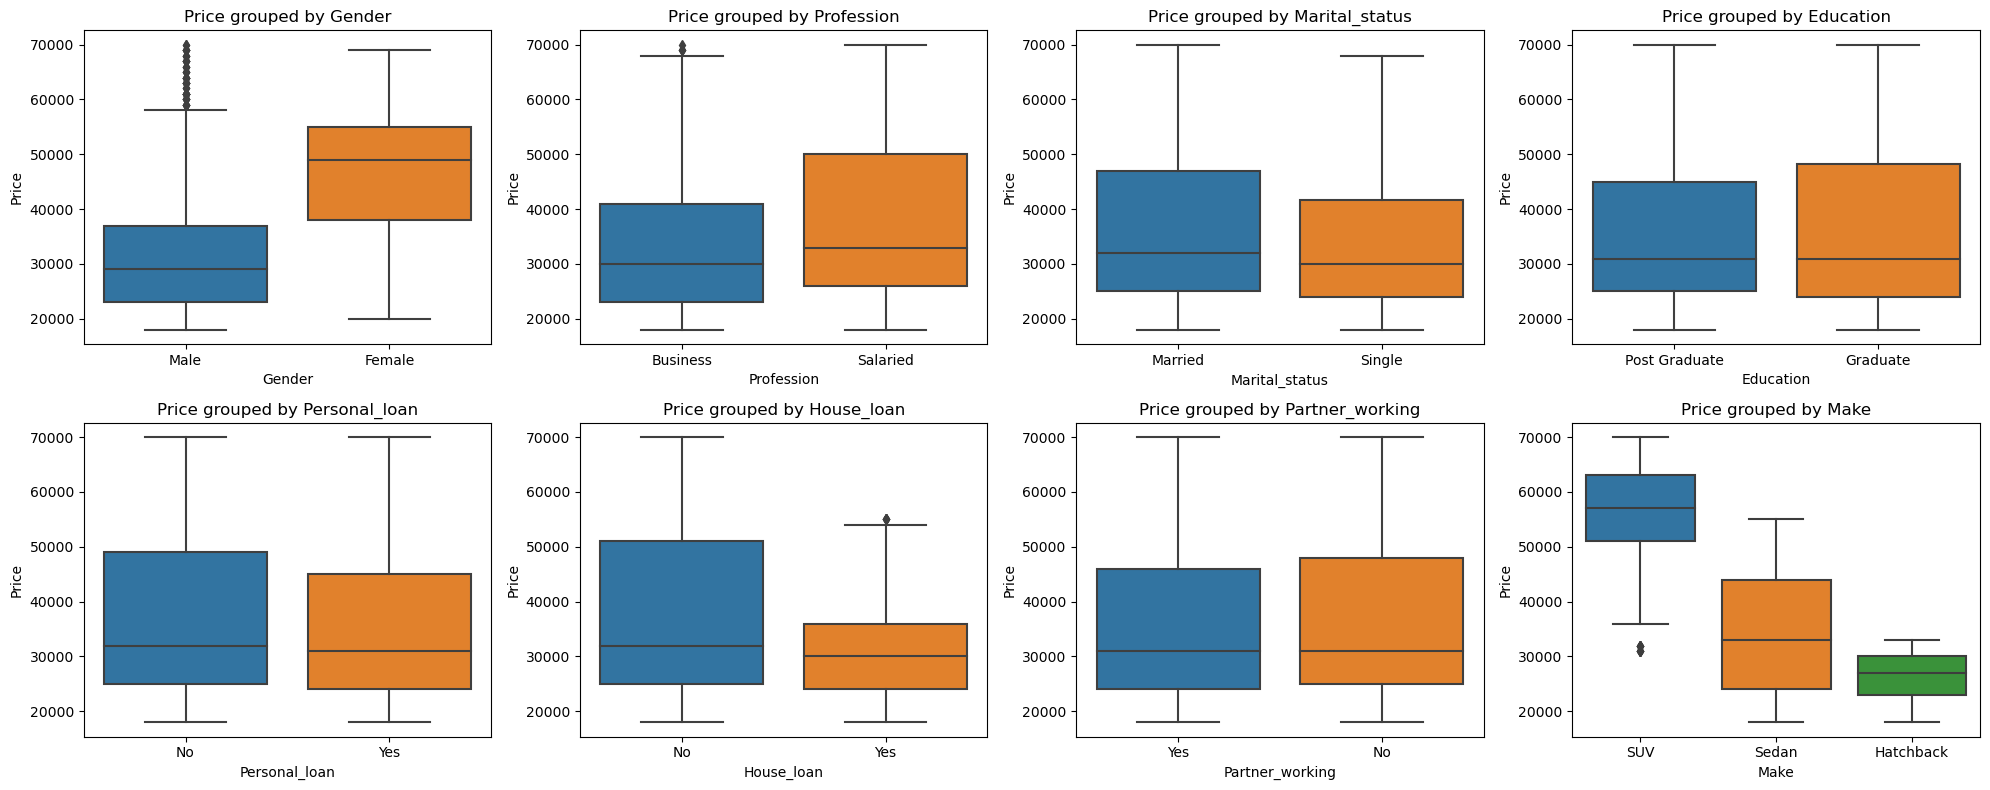

In [84]:
cat_vars = ['Gender', 'Profession', 'Marital_status', 'Education', 'Personal_loan', 'House_loan', 'Partner_working', 'Make']
num_var = 'Price'
num_cats = len(cat_vars)
cols = 4
rows = (num_cats + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4), sharey=False)
axes = axes.flatten() if rows > 1 else [axes]
for i, cat_var in enumerate(cat_vars):
    sns.boxplot(x=cat_var, y=num_var, data=df, ax=axes[i])
    axes[i].set_title(f'{num_var} grouped by {cat_var}')
    axes[i].set_xlabel(cat_var)
    axes[i].set_ylabel(num_var)
plt.tight_layout()
plt.show()

## Key Questions

### 1. Do men tend to prefer SUVs more compared to women?

In [85]:
df['Gender'] = df['Gender'].str.lower()
df['Make'] = df['Make'].str.lower()
suv_data = df[df['Make'].str.contains('suv')]
gender_counts = suv_data['Gender'].value_counts()
gender_percentages = suv_data['Gender'].value_counts(normalize=True) * 100
gender_counts,gender_percentages

(Gender
 female    173
 male      124
 Name: count, dtype: int64,
 Gender
 female    58.249158
 male      41.750842
 Name: proportion, dtype: float64)

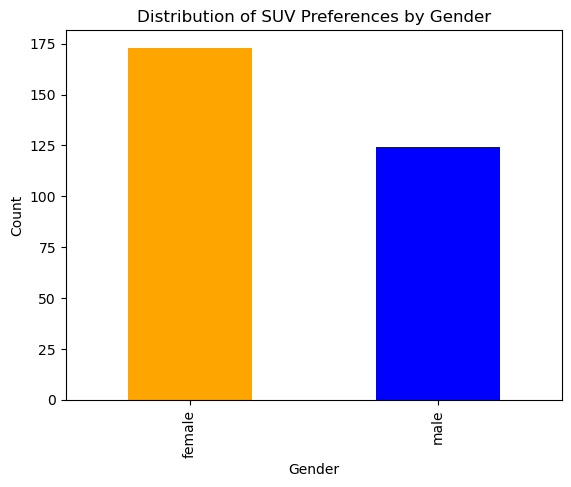

In [86]:
gender_counts.plot(kind='bar', color=['orange', 'blue'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of SUV Preferences by Gender')
plt.show()


## Based on the data provided, it appears that women tend to prefer SUVs more than men:

### Gender Counts:
#### There are 173 women who prefer SUVs, compared to 124 men.
#### This means there are more women who have chosen SUVs.
### Gender Percentages:
#### 58.25% of the individuals who prefer SUVs are women, while 41.75% are men.
#### This shows that women represent a higher proportion of those who prefer SUVs.
## In summary, the data indicates that women are more likely to prefer SUVs compared to men.

##  2. What is the likelihood of a salaried person buying a Sedan?

In [87]:
df['Profession'] = df['Profession'].str.lower()
df['Make'] = df['Make'].str.lower()
salaried_data = df[df['Profession'] == 'salaried']
sedan_purchases = salaried_data['Make'].str.contains('sedan').sum()
sedan_purchases

396

In [88]:
total_salaried = len(salaried_data)
sedan_proportion = sedan_purchases / total_salaried
sedan_proportion

0.4419642857142857

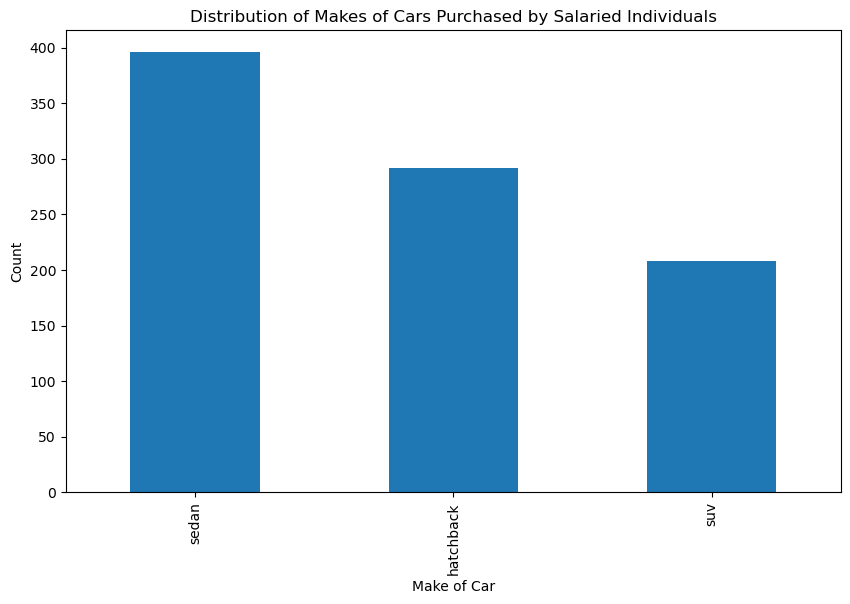

In [89]:
make_counts = salaried_data['Make'].value_counts()
make_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Make of Car')
plt.ylabel('Count')
plt.title('Distribution of Makes of Cars Purchased by Salaried Individuals')
plt.show()

### The provided data and calculations indicate that the likelihood of a salaried person buying a Sedan is approximately 44.20%.

## 3. What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale?

In [90]:
make_counts

Make
sedan        396
hatchback    292
suv          208
Name: count, dtype: int64

In [91]:
salaried_male_data = df[(df['Profession'] == 'salaried') & (df['Gender'] == 'male')]
suv_count_male = salaried_male_data['Make'].str.contains('suv').sum()
sedan_count_male = salaried_male_data['Make'].str.contains('sedan').sum()

In [92]:
salaried_male_data.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
4,53,male,salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,122100.0,57000,suv
7,52,male,salaried,Married,Graduate,4,No,No,Yes,79100,40400.0,119500.0,68000,suv
8,52,male,salaried,Married,Post Graduate,4,No,No,No,89400,0.0,89400.0,61000,suv
9,52,male,salaried,Married,Post Graduate,3,No,No,No,83700,0.0,83700.0,57000,suv
10,52,male,salaried,Married,Post Graduate,4,Yes,No,No,81600,0.0,81600.0,67000,suv


In [93]:
suv_count_male, sedan_count_male

(90, 305)

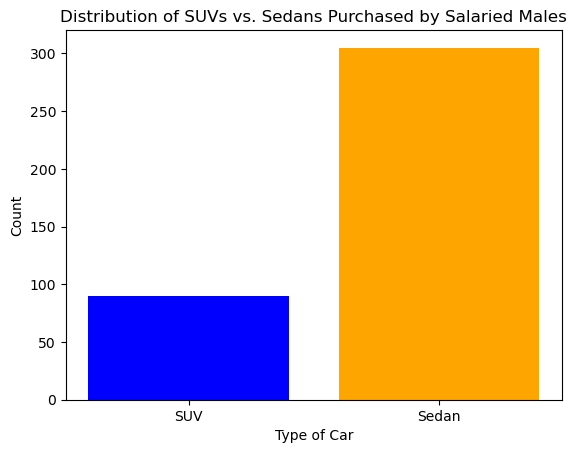

In [94]:
make_counts = {'SUV': suv_count_male, 'Sedan': sedan_count_male}
plt.bar(make_counts.keys(), make_counts.values(), color=['blue', 'orange'])
plt.xlabel('Type of Car')
plt.ylabel('Count')
plt.title('Distribution of SUVs vs. Sedans Purchased by Salaried Males')
plt.show()

### The results indicate that sedans make up a much higher proportion of the cars purchased by salaried males (305) compared to SUVs (90). This data suggests that salaried males are not necessarily easier targets for SUV sales over sedan sales, which is contrary to Sheldon Cooper's claim.

## 4. How does the the amount spent on purchasing automobiles vary by gender?

In [95]:
grouped_data = df.groupby('Gender')
numerical_columns = ['Price']
summary_stats = grouped_data[numerical_columns].agg(['mean', 'median', 'std'])
summary_stats

Price                       
                mean   median           std
Gender                                     
female  47705.167173  49000.0  11244.836378
male    32416.134185  29000.0  12366.253107

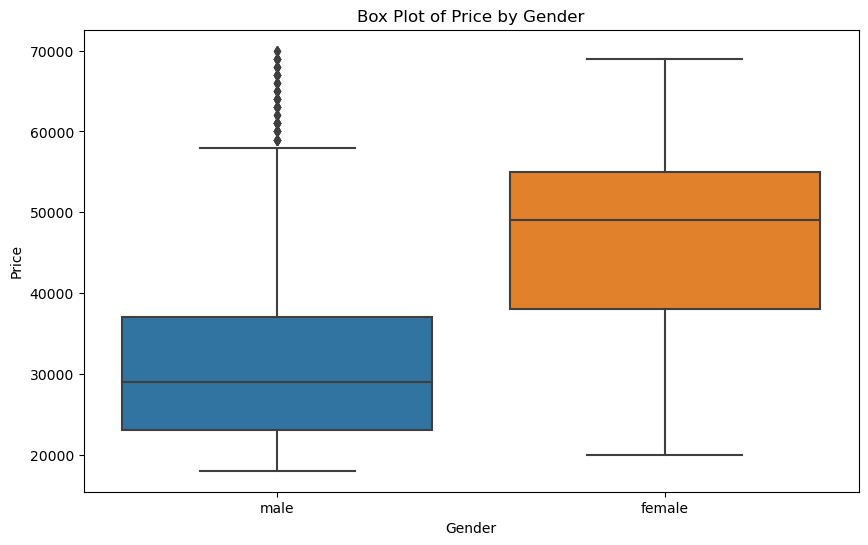

In [96]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Price', data=df)
plt.xlabel('Gender')
plt.ylabel('Price')
plt.title('Box Plot of Price by Gender')
plt.show()

#### Based on the provided descriptive statistics, there is a notable difference in the spending patterns on purchasing automobiles between genders. The mean price of automobiles purchased by females is significantly higher at approximately 47,705, compared to the mean price of 32,416 for males. This indicates that, on average, females are spending more on automobiles than males.

#### However, despite the lower mean price for males, the standard deviation of male spending is higher at approximately 12,366, compared to 11,244 for females. This suggests that there is more variability in the amounts males spend on automobiles. The higher standard deviation in male spending could be due to the presence of several outliers in the male gender group, indicating that some males are making purchases significantly higher or lower than the average.

##### The median price for females is 49,000, while for males, it is 29,000. This substantial difference between the median prices further supports the conclusion that females are generally spending more on automobiles than males.

##### Given the higher mean price and lower variability in female spending, along with the presence of outliers in male spending, the evidence suggests that females are likely purchasing higher-priced automobiles more consistently, while males exhibit a wider range of spending, including outliers. This could indicate different purchasing patterns and preferences between the genders.

## 5. How much money was spent on purchasing automobiles by individuals who took a personal loan?

In [97]:
personal_loan_data = df.loc[df['Personal_loan'] == 'Yes']
total_spent_personal_loan = personal_loan_data['Price'].sum()
total_spent_personal_loan

27290000

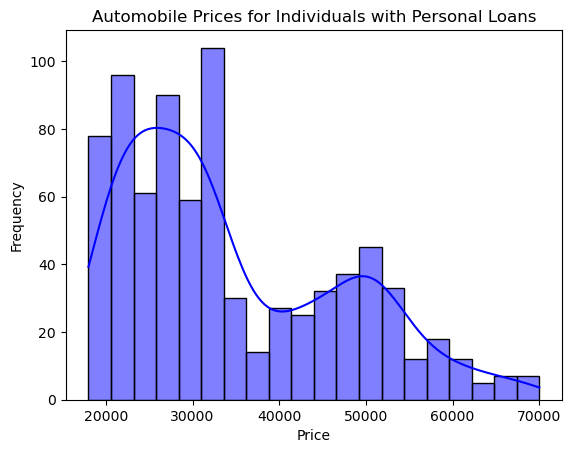

In [98]:
sns.histplot(personal_loan_data['Price'], bins=20, kde=True, color='blue')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Automobile Prices for Individuals with Personal Loans')
plt.show()

 ### A total of 27290000 was spent on purchasing automobiles by individuals who took a personal loan

## 6. How does having a working partner influence the purchase of higher-priced cars?

In [99]:
grouped_datapw = df.groupby('Partner_working')
numerical_columns = ['Price']
summary_statspw = grouped_datapw[numerical_columns].agg(['mean', 'median', 'std'])
summary_statspw

Price                       
                         mean   median           std
Partner_working                                     
No               36000.000000  31000.0  13817.734086
Yes              35267.281106  31000.0  13479.532555

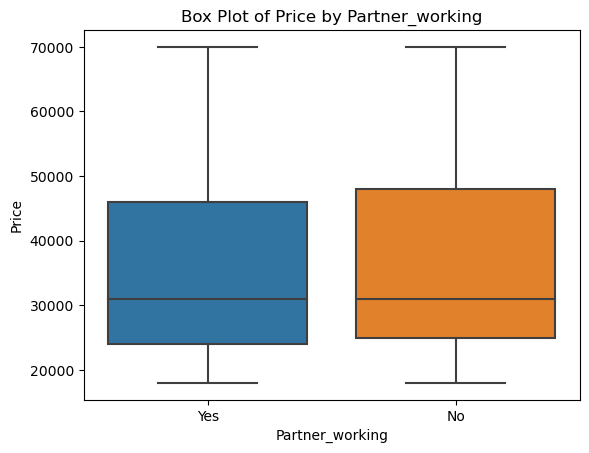

In [100]:
sns.boxplot(x='Partner_working', y='Price', data=df)
plt.xlabel('Partner_working')
plt.ylabel('Price')
plt.title('Box Plot of Price by Partner_working')
plt.show()

### Similar Spending Patterns: Both groups have similar mean and median prices, indicating that there isn't a significant difference in the average amount spent on purchasing cars between individuals with and without a working partner.

#### Slightly Higher Variability for Those Without a Working Partner: The slightly higher standard deviation for individuals without a working partner indicates a bit more variability in their spending on cars, suggesting that there might be a wider range of prices in the cars they purchase.
#### Overall, while there is not a major difference in the average or median prices of automobiles between the two groups, there is a slightly greater variability in the prices of cars purchased by individuals without a working partner. This might indicate different spending priorities or financial constraints among individuals in this group.

## Problem 1 - Actionable Insights & Recommendations
### Actionable Insights - Business Recommendations

 #### insights and recommendations based on the analysis will be discussed in the business report.

## Problem 2 - Framing Analytics Problem
### Analyse the dataset and list down the top 5 important variables, along with the business justifications.

# GODIGT Bank Company Data Analysis

### Context

A bank generates revenue through interest, transaction fees, and financial advice, with interest charged on customer loans being a significant source of profits. GODIGT Bank, a mid-sized private bank, offers various banking products and cross-sells asset products to existing customers through different communication methods. However, the bank is facing high credit card attrition, leading them to reevaluate their credit card policy to ensure customers receive the right card for higher spending and intent, resulting in profitable relationships.

### Objective

As a Data Scientist at the company and the Data Science team has shared some data. You are supposed to find the key variables that have a vital impact on the analysis which will help the company to improve the business.

### Data Description

* userid - Unique bank customer-id
* card_no - Masked credit card number
* card_bin_no - Credit card IIN number
* Issuer - Card network issuer
* card_type - Credit card type
* card_source_data - Credit card sourcing date
* high_networth - Customer category based on their net-worth value (A: High to E: Low)
* active_30 - Savings/Current/Salary etc. account activity in last 30 days
* active_60 - Savings/Current/Salary etc. account activity in last 60 days
* active_90 - Savings/Current/Salary etc. account activity in last 90 days
* cc_active30 - Credit Card activity in the last 30 days
* cc_active60 - Credit Card activity in the last 60 days
* cc_active90 - Credit Card activity in the last 90 days
* hotlist_flag - Whether card is hot-listed(Any problem noted on the card)
* widget_products - Number of convenience products customer holds (dc, cc, net-banking active, mobile banking active, wallet active, etc.)
* engagement_products - Number of investment/loan products the customer holds (FD, RD, Personal loan, auto loan)
* annual_income_at_source - Annual income recorded in the credit card application
* other_bank_cc_holding - Whether the customer holds another bank credit card
* bank_vintage - Vintage with the bank (in months) as on Tthmonth
* T+1_month_activity - Whether customer uses credit card in T+1 month (future)
* T+2_month_activity - Whether customer uses credit card in T+2 month (future)
* T+3_month_activity - Whether customer uses credit card in T+3 month (future)
* T+6_month_activity - Whether customer uses credit card in T+6 month (future)
* T+12_month_activity - Whether customer uses credit card in T+12 month (future)
* Transactor_revolver - Revolver: Customer who carries balances over from one month to the next. Transactor: Customer who pays off their balances in full every month.
* avg_spends_l3m - Average credit card spends in last 3 months
* Occupation_at_source - Occupation recorded at the time of credit card application
* cc_limit - Current credit card limit

# The 5 key variables that have a vital impact on the analysis which will help the company to improve the business

## cc_limit (Current credit card limit):
Justification: The credit card limit can influence how much a customer can spend. Customers with higher limits may be more engaged and have higher spending capacity, directly impacting the bank's revenue. Adjusting limits based on customer needs and spending patterns can lead to more profitable relationships.

## bank_vintage (Vintage with the bank in months):
Justification: Customers who have been with the bank for a longer period tend to be more loyal and have established trust with the bank. A higher bank vintage can be associated with lower attrition rates and increased likelihood of using multiple banking products, which can boost profitability.
## high_networth (Customer category based on their net-worth value):
Justification: Customers with higher net worth may have greater financial stability and spending potential. Targeting high-net-worth customers with tailored offers and products can enhance loyalty and drive higher usage and profitability.

## avg_spends_l3m (Average credit card spends in the last 3 months):
Justification: This variable directly reflects recent customer activity and engagement with their credit card. Higher average spending indicates active usage, which can be a predictor of future spending and profitability. It can also signal satisfaction with the credit card and may help in identifying high-value customers.

## T+1_month_activity (Whether customer uses credit card in T+1 month - future usage):
Justification: Predicting future credit card usage can provide valuable insights for customer retention strategies. If a customer is likely to use their card in the next month, the bank can engage them with personalized offers and incentives to maintain their activity and loyalty.

In [101]:
df2=pd.read_excel('godigt_cc_data.xlsx')

In [103]:
df2.shape

(8448, 28)

In [105]:
df2.head()

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
0,1,4384 39XX XXXX XXXX,438439,Visa,edge,2019-09-29,B,0,1,1,...,27,0,0,0,0,0,T,27729,Self Employed,290000
1,2,4377 48XX XXXX XXXX,437748,Visa,prosperity,2002-10-30,A,1,1,1,...,52,0,0,0,0,0,R,280854,0,950000
2,3,4377 48XX XXXX XXXX,437748,Visa,rewards,2013-10-05,C,0,0,0,...,23,1,0,0,0,0,R,70587,Student,210000
3,4,4258 06XX XXXX XXXX,425806,Visa,indianoil,1999-06-01,E,0,1,1,...,49,0,0,1,0,0,T,9156,Self Employed,80000
4,5,4377 48XX XXXX XXXX,437748,Visa,edge,2006-06-13,B,1,1,1,...,21,1,0,0,0,0,T,38108,Salaried,220000


In [106]:
df2.isnull().sum()

userid                      0
card_no                     0
card_bin_no                 0
Issuer                      0
card_type                   0
card_source_date            0
high_networth               0
active_30                   0
active_60                   0
active_90                   0
cc_active30                 0
cc_active60                 0
cc_active90                 0
hotlist_flag                0
widget_products             0
engagement_products         0
annual_income_at_source     0
other_bank_cc_holding       0
bank_vintage                0
T+1_month_activity          0
T+2_month_activity          0
T+3_month_activity          0
T+6_month_activity          0
T+12_month_activity         0
Transactor_revolver        38
avg_spends_l3m              0
Occupation_at_source        0
cc_limit                    0
dtype: int64

 ##### For categorical columns we will replace the missing values with mode values.

In [119]:
mode1=df2["Transactor_revolver"].mode().values[0]
df2['Transactor_revolver'].mode().values
df2["Transactor_revolver"]=df2["Transactor_revolver"].replace(np.nan,mode1)
df2.isnull().sum()

userid                     0
card_no                    0
card_bin_no                0
Issuer                     0
card_type                  0
card_source_date           0
high_networth              0
active_30                  0
active_60                  0
active_90                  0
cc_active30                0
cc_active60                0
cc_active90                0
hotlist_flag               0
widget_products            0
engagement_products        0
annual_income_at_source    0
other_bank_cc_holding      0
bank_vintage               0
T+1_month_activity         0
T+2_month_activity         0
T+3_month_activity         0
T+6_month_activity         0
T+12_month_activity        0
Transactor_revolver        0
avg_spends_l3m             0
Occupation_at_source       0
cc_limit                   0
dtype: int64

### Looking at the columns in the dataset, the 5 variables which can be of interest for us for framing a good  analytical business problem . The columns look as follows:

#### cc_limit
#### bank_vintage
#### high_networth
#### avg_spends_l3m
#### T+1_month_activity

## Exploratory Data Analysis (EDA)

In [120]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


In [121]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

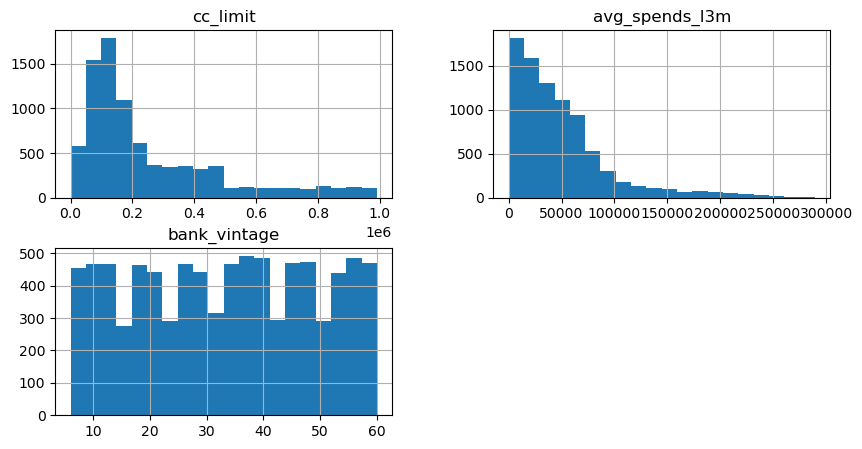

In [128]:
# Histograms for continuous variables
df2[['cc_limit', 'avg_spends_l3m', 'bank_vintage']].hist(bins=20, figsize=(10, 5))
plt.show()

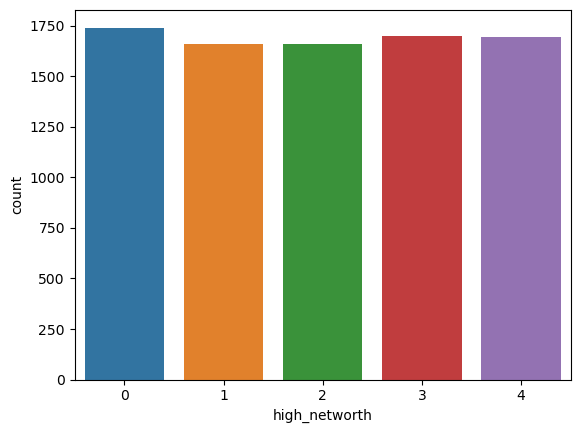

In [127]:
# Bar plot for categorical variable
sns.countplot(x='high_networth', data=df2)
plt.show()


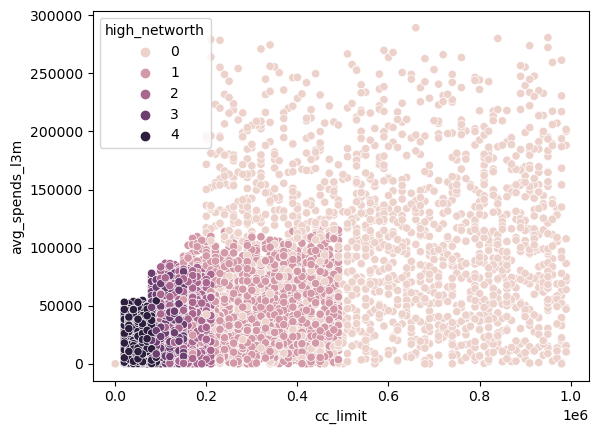

In [129]:
sns.scatterplot(x='cc_limit', y='avg_spends_l3m', data=df2, hue='high_networth')
plt.show()

C:\Users\ahmed\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


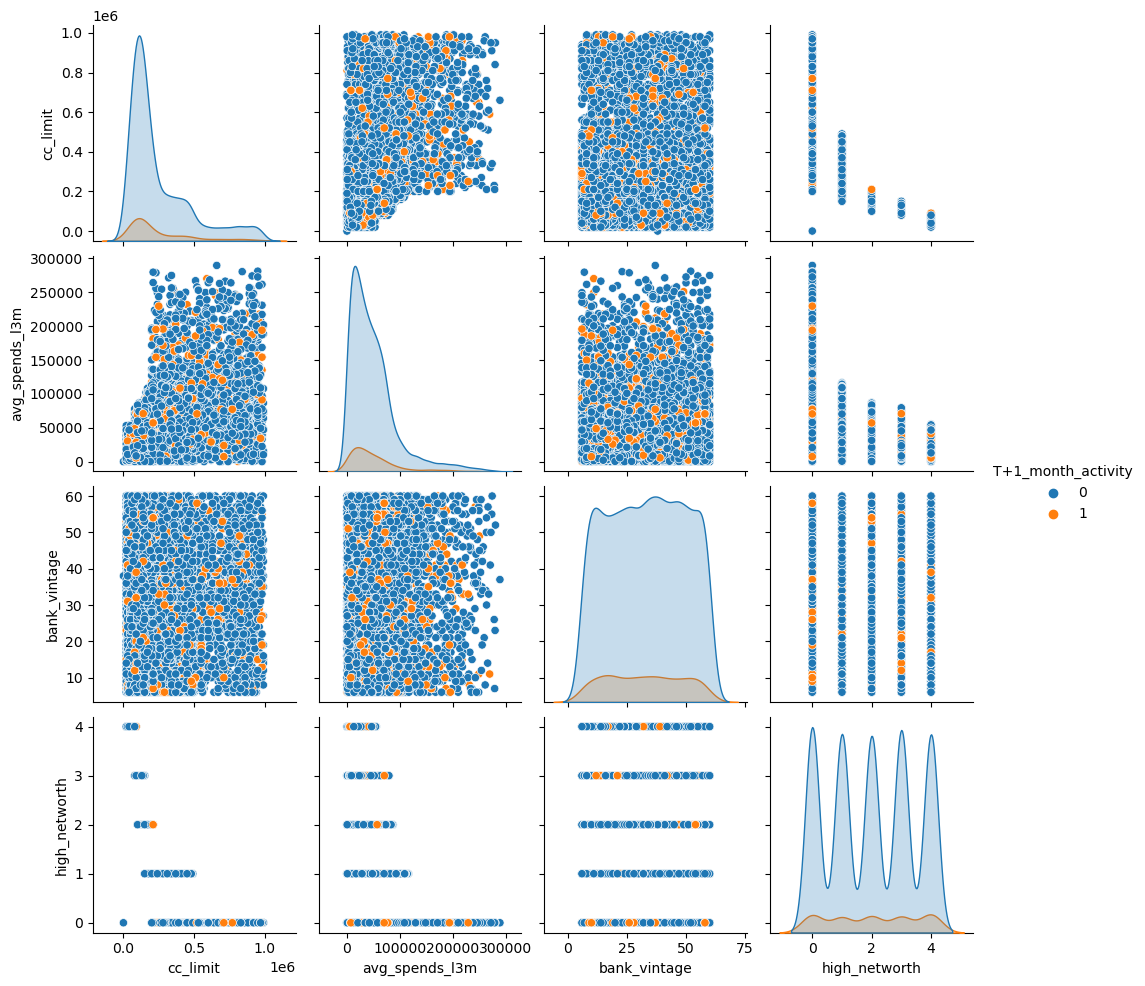

In [130]:
sns.pairplot(df2[['cc_limit', 'avg_spends_l3m', 'bank_vintage', 'high_networth', 'T+1_month_activity']], hue='T+1_month_activity')
plt.show()

In [122]:
df2['high_networth'] = le.fit_transform(df2['high_networth'])

In [123]:
corr_df2 = df2[['cc_limit', 'avg_spends_l3m', 'bank_vintage', 'high_networth', 'T+1_month_activity']].corr()

In [124]:
corr_df2.corr()

,cc_limit,avg_spends_l3m,bank_vintage,high_networth,T+1_month_activity
cc_limit,1.000000,0.855799,-0.130164,-0.986518,-0.129037
avg_spends_l3m,0.855799,1.000000,-0.192070,-0.900484,-0.169591
bank_vintage,-0.130164,-0.192070,1.000000,0.077436,-0.284864
high_networth,-0.986518,-0.900484,0.077436,1.000000,0.068690
T+1_month_activity,-0.129037,-0.169591,-0.284864,0.068690,1.000000


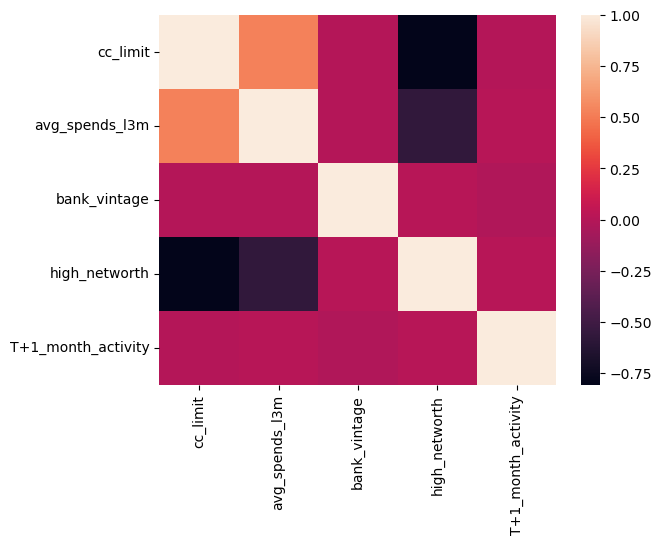

In [125]:
sns.heatmap(corr_df2)
plt.show()

# Notes 

Model Performance Metrics:
cc_limit and avg_spends_l3m: The correlation between cc_limit and avg_spends_l3m is high (0.855799), indicating that higher credit limits are associated with higher average spending. This suggests that customers with higher credit limits tend to spend more on their credit cards.
high_networth: The correlation between high_networth and T+1_month_activity is low (0.068690). This suggests that the high-net-worth status of a customer has minimal direct impact on whether they will use their credit card in the next month.
bank_vintage: There is a negative correlation between bank_vintage and T+1_month_activity (-0.284864), suggesting that customers who have been with the bank for a longer period are less likely to use their credit cards in the next month.
2. Formulate Recommendations:

Targeted Strategies:
High-Potential Customers: Focus on high-potential customers who have a higher credit limit and higher average spending (cc_limit and avg_spends_l3m). These customers may benefit from personalized offers such as rewards programs, cashback incentives, or higher-tier cards that offer additional perks based on their spending habits.
Loyalty Programs for Bank Vintage: Since longer tenure with the bank (bank_vintage) is associated with lower credit card usage, consider loyalty programs or incentives for long-term customers to encourage them to use their credit cards more frequently. This could include targeted promotions, exclusive offers, or discounts.
Promotions for High Net Worth Customers: Even though the direct impact of high_networth on T+1_month_activity is low, these customers may still have the financial capacity for higher spending. Offer personalized promotions, rewards, or exclusive card options to engage these customers and potentially increase their credit card usage.
Engagement Strategies: Create targeted engagement strategies based on customer segments. For instance, customers with higher cc_limit and avg_spends_l3m might be more receptive to higher credit limits and targeted marketing campaigns.
3. Recommendations Based on Correlation Analysis:

Negative Correlation: The negative correlation between cc_limit and high_networth (-0.986518) suggests that customers with higher net worth may have lower credit limits, which could be due to the bank's existing policy or customer preferences. Consider evaluating this policy to see if there is an opportunity to offer higher limits to high net worth customers to incentivize greater spending.
Monitoring Trends: Regularly monitor the spending patterns and credit usage of different customer segments to identify potential shifts in behavior that could impact future activity. This information can guide adjustments to your credit card policy and targeted marketing strategies.
These insights and recommendations can guide GODIGT Bank in developing targeted marketing campaigns, personalized offers, and strategic adjustments to their credit card policies to increase customer engagement and optimize profitability.Model Performance Metrics:
cc_limit and avg_spends_l3m: The correlation between cc_limit and avg_spends_l3m is high (0.855799), indicating that higher credit limits are associated with higher average spending. This suggests that customers with higher credit limits tend to spend more on their credit cards.
high_networth: The correlation between high_networth and T+1_month_activity is low (0.068690). This suggests that the high-net-worth status of a customer has minimal direct impact on whether they will use their credit card in the next month.
bank_vintage: There is a negative correlation between bank_vintage and T+1_month_activity (-0.284864), suggesting that customers who have been with the bank for a longer period are less likely to use their credit cards in the next month.
2. Formulate Recommendations:

Targeted Strategies:
High-Potential Customers: Focus on high-potential customers who have a higher credit limit and higher average spending (cc_limit and avg_spends_l3m). These customers may benefit from personalized offers such as rewards programs, cashback incentives, or higher-tier cards that offer additional perks based on their spending habits.
Loyalty Programs for Bank Vintage: Since longer tenure with the bank (bank_vintage) is associated with lower credit card usage, consider loyalty programs or incentives for long-term customers to encourage them to use their credit cards more frequently. This could include targeted promotions, exclusive offers, or discounts.
Promotions for High Net Worth Customers: Even though the direct impact of high_networth on T+1_month_activity is low, these customers may still have the financial capacity for higher spending. Offer personalized promotions, rewards, or exclusive card options to engage these customers and potentially increase their credit card usage.
Engagement Strategies: Create targeted engagement strategies based on customer segments. For instance, customers with higher cc_limit and avg_spends_l3m might be more receptive to higher credit limits and targeted marketing campaigns.
3. Recommendations Based on Correlation Analysis:

Negative Correlation: The negative correlation between cc_limit and high_networth (-0.986518) suggests that customers with higher net worth may have lower credit limits, which could be due to the bank's existing policy or customer preferences. Consider evaluating this policy to see if there is an opportunity to offer higher limits to high net worth customers to incentivize greater spending.
Monitoring Trends: Regularly monitor the spending patterns and credit usage of different customer segments to identify potential shifts in behavior that could impact future activity. This information can guide adjustments to your credit card policy and targeted marketing strategies.
These insights and recommendations can guide GODIGT Bank in developing targeted marketing campaigns, personalized offers, and strategic adjustments to their credit card policies to increase customer engagement and optimize profitability.